## **Air Quality: Trends and Insights Across Indian Cities**

# Dataset
* **Name:** Air Quality Data in India (2015 - 2020) 
* **Source:** Kaggle

# Features 
* **City:** Indian City; [Ahmedabad, Aizawl...]
* **Date:** in which the data is collected per record [year-month-day].
* **PM2.5:** Fine inhalable particles, pose the greatest health risk as they penetrate deep into lungs.
* **PM10:** Coarse inhalable particles; less harmful than PM2.5 but still dangerous for respiratory health.
* **NO (Nitric Oxide):** Gas from vehicle exhaust and combustion.
* **NO2 (Nitrogen Dioxide):** Toxic gas causing respiratory problems.
* **NOx (Nitrogen Oxides):** Combination of NO and NO2.
* **NH3 (Ammonia):** Comes from agricultural activities (fertilizers, livestock).
* **CO (Carbon Monoxide):** Produced by incomplete combustion (vehicles, industries).
* **SO2 (Sulfur Dioxide):** Gas from burning fossil fuels.
* **O3 (Ozone):** Ground-level ozone formed by reaction of NOx and VOCs in sunlight.
* **Benzene:** Volatile organic compound (VOC).
* **Toluene:** VOC used in paints and fuels.
* **Xylene:** VOC from fuel combustion and industrial use.
* **AQI (Air Quality Index):** Composite index that summarizes air pollution into a single value; The greater value the worst air quality.
* **AQI_Bucket:** Categorical label for AQI (Good, Satisfactory, Moderate, Poor, Very Poor, Severe).

# Goals
* Trend Analysis: How has PM2.5 changed across Indian cities from 2015-2020?

* Seasonality Insights: Which months show worst air quality over 2015-2020?
* Pollutants Impact on AQI: Which pollutants are most responsible for poor air quality?
* Rank Cities based on Their Air Quality at 2020.

# Why PM2.5 Matters
PM2.5 are fine particles small enough to penetrate deep into the lungs and bloodstream, posing severe health risks like respiratory and heart diseases. It is also the main driver of AQI levels in urban areas, making it a key indicator when analyzing air pollution trends.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [3]:
df = pd.read_csv("./city_day.csv/city_day.csv")

# Exploring Dataset

HOW?
* Display the first 5 records using head().

* Displaying column names.

* Display Statistical description of the numerical data [count, mean, std...] using describe().

* Display the not-null values count and the type of each column in the dataset, using info().

In [4]:
df.head(5)

City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN

In [5]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [6]:
df.describe()

PM2.5          PM10            NO           NO2           NOx  \
count  24933.000000  18391.000000  25949.000000  25946.000000  25346.000000   
mean      67.450578    118.127103     17.574730     28.560659     32.309123   
std       64.661449     90.605110     22.785846     24.474746     31.646011   
min        0.040000      0.010000      0.020000      0.010000      0.000000   
25%       28.820000     56.255000      5.630000     11.750000     12.820000   
50%       48.570000     95.680000      9.890000     21.690000     23.520000   
75%       80.590000    149.745000     19.950000     37.620000     40.127500   
max      949.990000   1000.000000    390.680000    362.210000    467.630000   

                NH3            CO           SO2            O3       Benzene  \
count  19203.000000  27472.000000  25677.000000  25509.000000  23908.000000   
mean      23.483476      2.248598     14.531977     34.491430      3.280840   
std       25.684275      6.962884     18.133775     21.694928     15.811136   
min        0.010000      0.000000      0.010000      0.010000      0.000000   
25%        8.580000      0.510000      5.670000     18.860000      0.120000   
50%       15.850000      0.890000      9.160000     30.840000      1.070000   
75%       30.020000      1.450000     15.220000     45.570000      3.080000   
max      352.890000    175.810000    193.860000    257.730000    455.030000   

            Toluene        Xylene           AQI  
count  21490.000000  11422.000000  24850.000000  
mean       8.700972      3.070128    166.463581  
std       19.969164      6.323247    140.696585  
min        0.000000      0.000000     13.000000  
25%        0.600000      0.140000     81.000000  
50%        2.970000      0.980000    118.000000  
75%        9.150000      3.350000    208.000000  
max      454.850000    170.370000   2049.000000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


# Exploring Date Feature 

How?
* Convert Date Column type from 'object' to 'datetime'.

* Extract new features from Date Column [Year, Month, Day] (usful for further analysis).


Convert Date Column To Date-time

In [8]:
df["Date"] = pd.to_datetime(df["Date"], yearfirst=True)

Extracting New Features (Year, Month, Day)

In [9]:
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day

# Exploring Cities included in the Dataset

How?
* Display all Cities names in the dataset.

* Dropping the records of the cities that are recorded only in 3 years or less [2018, 2019, 2020], as they are unecessary for our study.

In [10]:
df["City"].unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

* Exploring & Filering (Unnessesary) Cities

In [11]:
df.groupby("City")["Year"].unique()

City
Ahmedabad             [2015, 2016, 2017, 2018, 2019, 2020]
Aizawl                                              [2020]
Amaravati                         [2017, 2018, 2019, 2020]
Amritsar                          [2017, 2018, 2019, 2020]
Bengaluru             [2015, 2016, 2017, 2018, 2019, 2020]
Bhopal                                        [2019, 2020]
Brajrajnagar                      [2017, 2018, 2019, 2020]
Chandigarh                                    [2019, 2020]
Chennai               [2015, 2016, 2017, 2018, 2019, 2020]
Coimbatore                                    [2019, 2020]
Delhi                 [2015, 2016, 2017, 2018, 2019, 2020]
Ernakulam                                           [2020]
Gurugram              [2015, 2016, 2017, 2018, 2019, 2020]
Guwahati                                      [2019, 2020]
Hyderabad             [2015, 2016, 2017, 2018, 2019, 2020]
Jaipur                            [2017, 2018, 2019, 2020]
Jorapokhar                        [2017, 2018, 2019

* Dropping Cities with only 3 years (or less) records

In [12]:
cities_to_drop = ["Aizawl", "Chandigarh", "Coimbatore", "Ernakulam","Guwahati", "Kolkata", "Mumbai", "Shillong", "Talcher"]
df = df.drop(df[df["City"].isin(cities_to_drop)].index)

# Checking For Duplicated Records

In [13]:
df.duplicated().sum()

0

# Checking Extreme Outliers 

How?
* Dropping any negative pollutant records, as it is not possible to be a negative value.

* Dropping any values that exceed the maximum value of each pollutant (Not Possible values).

NOTE!
* only the following features exceeded their normal range, according the data description done above (min, max analysis).

**CO Normal Range:**
* 0 < CO <= 50

- Before Removing Extreme Outliers

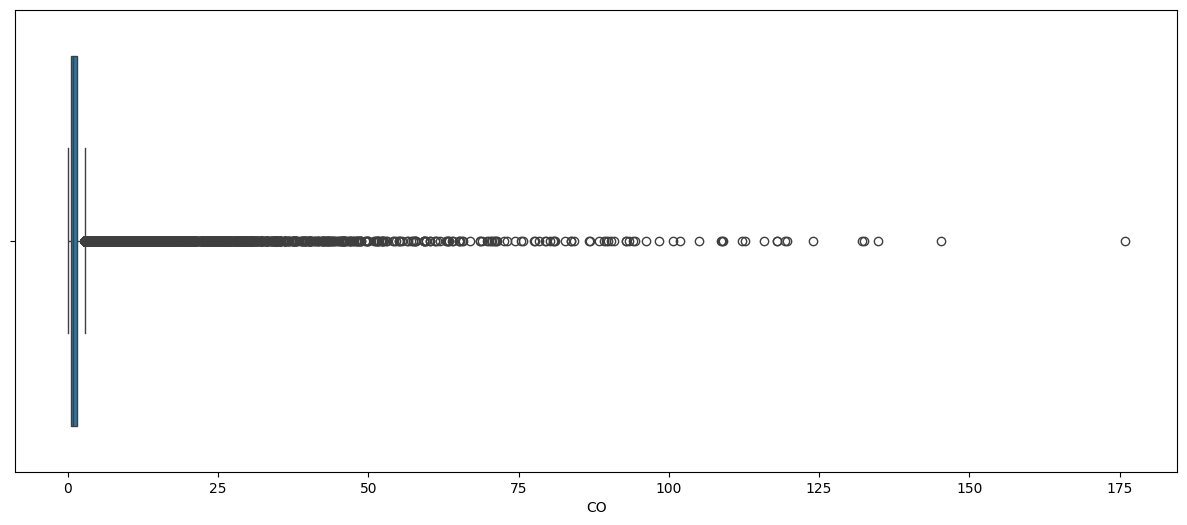

In [14]:
plt.figure(figsize=(15, 6))
sns.boxplot(df, x="CO")
plt.show()

In [15]:
df = df[(df["CO"] >= 0) & (df["CO"] <= 50)]

* After Removing Extreme Outliers

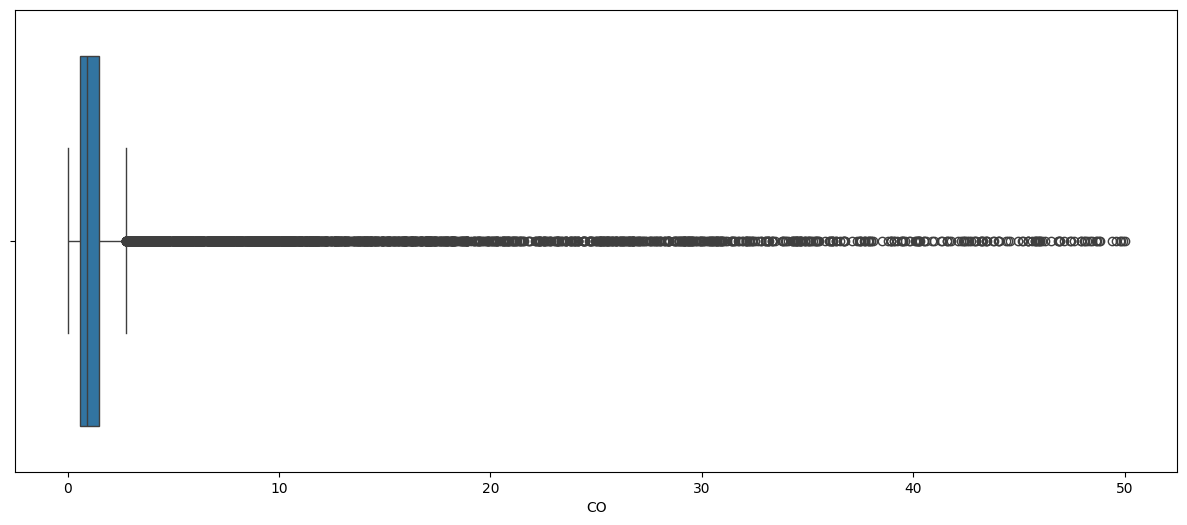

In [16]:
plt.figure(figsize=(15, 6))
sns.boxplot(df, x="CO")
plt.show()

**Benzene Normal Range:**
* 0 <= Benzene <= 100

* Before Removing Extreme Outliers

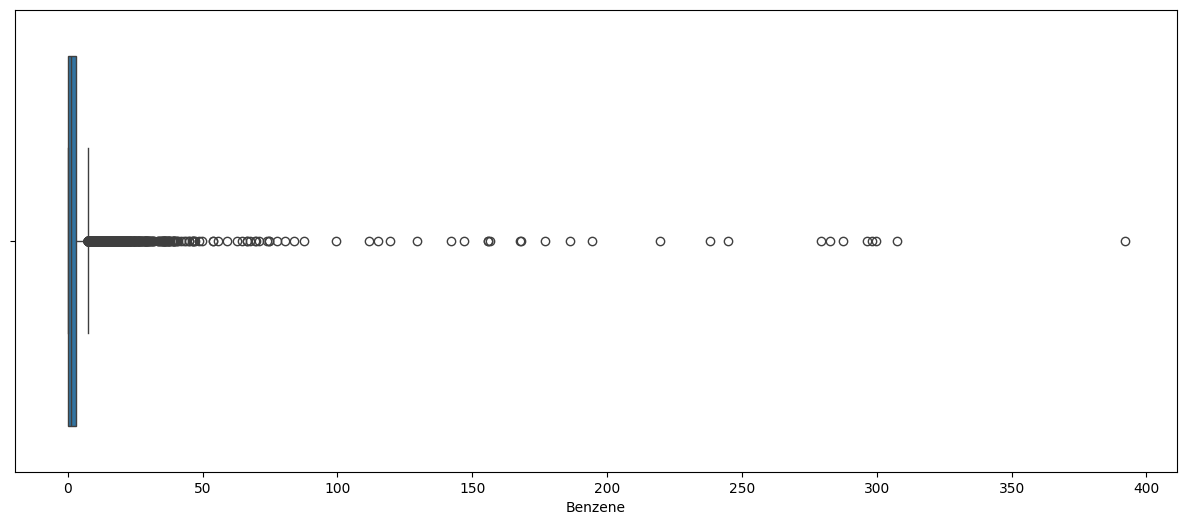

In [17]:
plt.figure(figsize=(15, 6))
sns.boxplot(df, x="Benzene")
plt.show()

In [18]:
df = df[(df["Benzene"] >= 0) & (df["Benzene"] <= 100)]

* After Removing Extreme Outliers

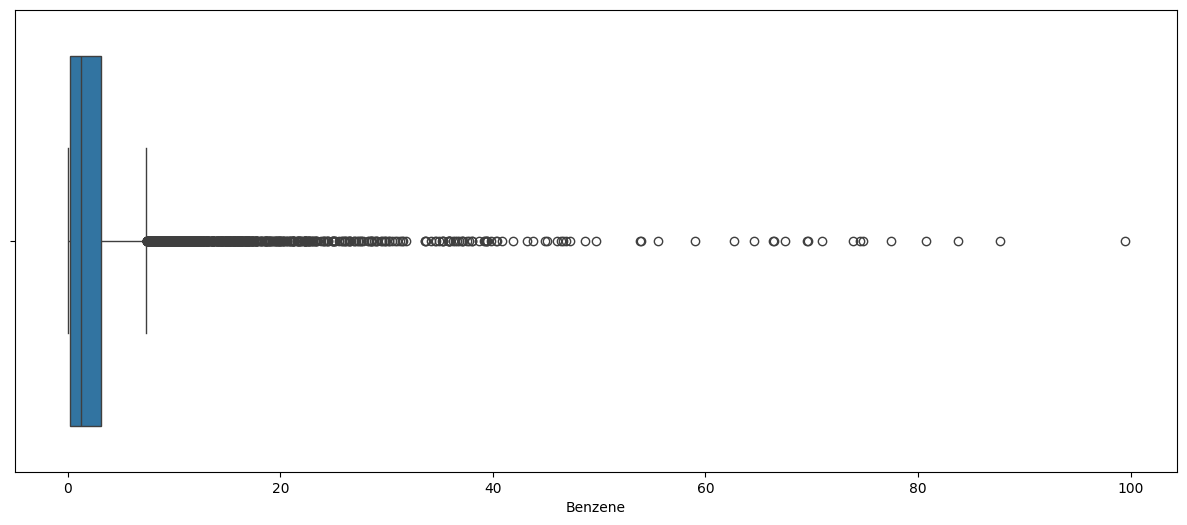

In [19]:
plt.figure(figsize=(15, 6))
sns.boxplot(df, x="Benzene")
plt.show()

**AQI Normal Range:**
* AQI 0 <= AQI <= 500

* Before Removing Extreme Outliers

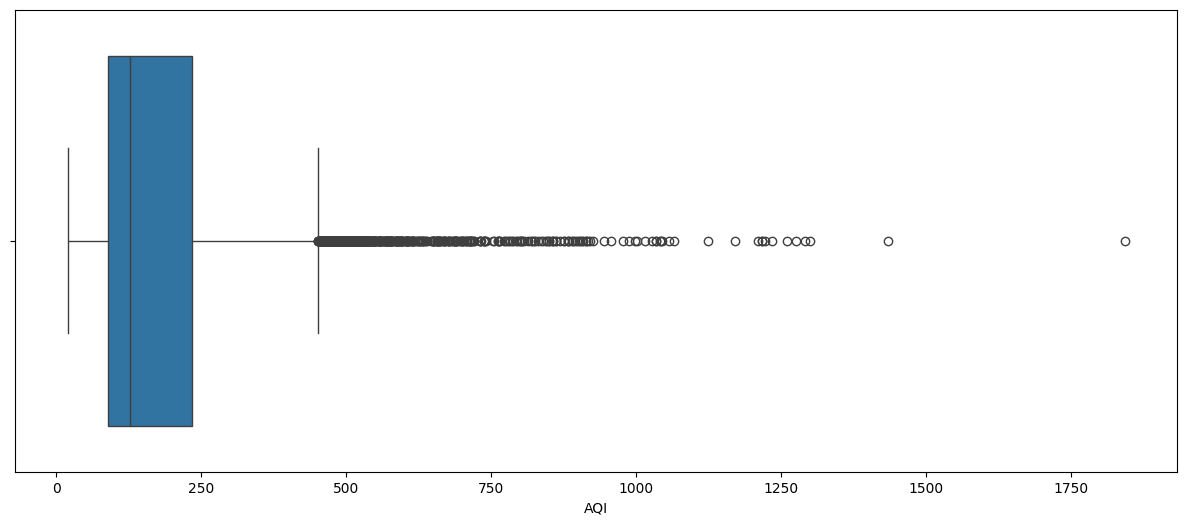

In [20]:
plt.figure(figsize=(15, 6))
sns.boxplot(df, x="AQI")
plt.show()

In [21]:
df = df[df["AQI"] <= 500]

* After Removing Extreme Outliers

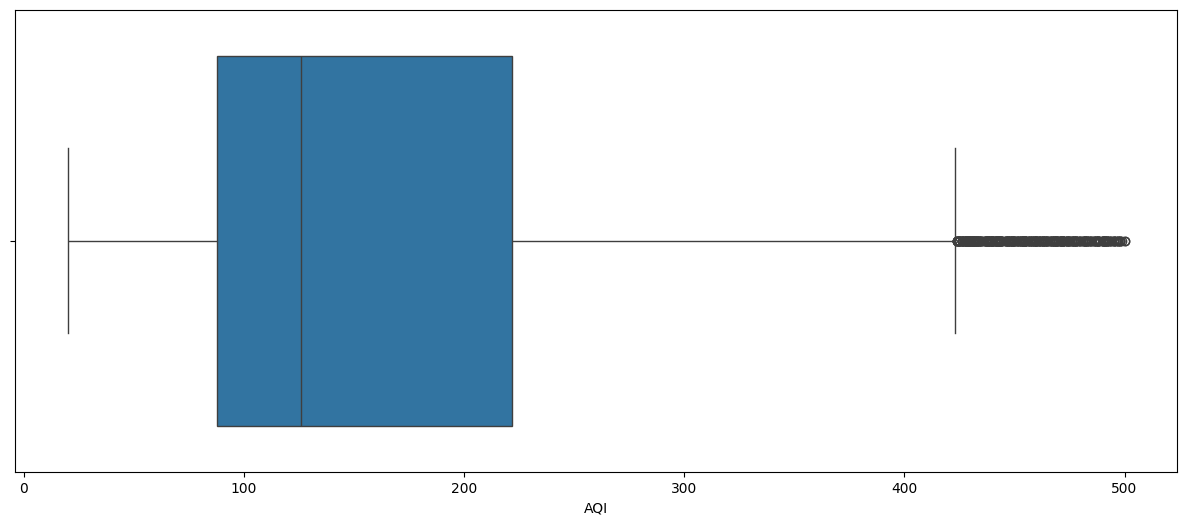

In [22]:
plt.figure(figsize=(15, 6))
sns.boxplot(df, x="AQI")
plt.show()

# Missing Values Detection

How?
* Check which columns contain missing values usning isna().

* Visualize it with a heatmap to describe where the missing values lie.

In [23]:
df.isna().sum()

City             0
Date             0
PM2.5          111
PM10          5864
NO              99
NO2            101
NOx            758
NH3           4698
CO               0
SO2            346
O3             318
Benzene          0
Toluene        913
Xylene        8813
AQI              0
AQI_Bucket       0
Year             0
Month            0
Day              0
dtype: int64

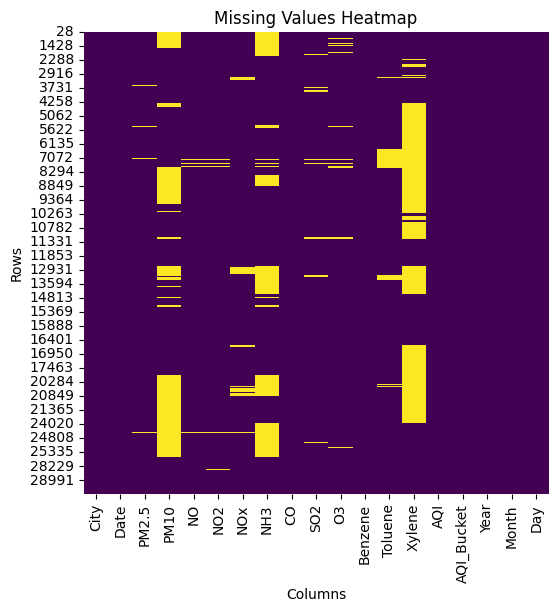

In [24]:
# Create heatmap of missing values
plt.figure(figsize=(6, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis") 
plt.xlabel("Columns")
plt.ylabel("Rows") 
plt.title("Missing Values Heatmap")
plt.show()

# Handling Missing Values

How?
1. Group the Feature by the City.
2. For each city calculate the median of its feature (example: PM2.5).
3. Replace the missing data for each city with the city records' median.

NOTE!
* The median of the city records may be NaN for some cases.
In this case, we should perform a different approach:
1. Calculate the mean of the values of the other features in the same record.
2. Fill the missing value with the mean of its record values.

**PM2.5 Missing Values:**

Here the first approach worked well!

In [25]:
PM2_Medians = df.groupby("City")['PM2.5'].transform('median')
df["PM2.5"] = df["PM2.5"].fillna(PM2_Medians)

In [26]:
df['PM2.5'].isna().sum()

0

**PM10 Missing Values:**

Here Lacknow City has a NaN median, so we continue to fill it with the second approach (which is less accurate but efficient)!

In [27]:
#First Aproach: Fill with Column median per city.
pm10_medians = df.groupby("City")['PM10'].transform('median')
df['PM10'] = df['PM10'].fillna(pm10_medians)
print(df.groupby("City")["PM10"].median())

City
Ahmedabad         99.050
Amaravati         66.400
Amritsar          99.640
Bengaluru         78.550
Brajrajnagar     118.710
Chennai           50.245
Delhi            212.830
Gurugram         171.030
Hyderabad         94.330
Jaipur           117.500
Lucknow              NaN
Patna            118.020
Visakhapatnam    101.010
Name: PM10, dtype: float64


In [28]:
#Still Lacknow Has NaN value for city
#Second Aproach filling with row mean
rows_mean = df.mean(axis=1, skipna=True, numeric_only=True)
df["PM10"] = df["PM10"].fillna(rows_mean).T

In [29]:
df['PM10'].isna().sum()


0

**NO Missing Values:**

In [30]:
NO_medians = df.groupby("City")["NO"].transform("median")
df["NO"] = df["NO"].fillna(NO_medians)

In [31]:
df["NO"].isna().sum()

0

**NO2 Missing Values**

In [32]:
NO2_medians = df.groupby("City")["NO2"].transform("median")
df["NO2"] = df["NO2"].fillna(NO2_medians)

In [33]:
df["NO2"].isna().sum()

0

**NOx Missing Values**

In [34]:
NOx_medians = df.groupby("City")["NOx"].transform("median")
df["NOx"] = df["NOx"].fillna(NOx_medians)

In [35]:
df["NOx"].isna().sum()

0

**NH3 Missing Values**

In [36]:
NH3_medians = df.groupby("City")["NH3"].transform("median")
df["NH3"] = df["NH3"].fillna(NH3_medians)

In [37]:
df["NH3"].isna().sum()

880

In [38]:
df["NH3"] = df["NH3"].fillna(rows_mean).T

In [39]:
df["NH3"].isna().sum()

0

**CO Missing Values**

In [40]:
CO_medians = df.groupby("City")["CO"].transform("median")
df["CO"] = df["CO"].fillna(CO_medians)

In [41]:
df["CO"].isna().mean()

0.0

**SO2 Missing Values**

In [42]:
SO2_medians = df.groupby("City")["SO2"].transform("median")
df["SO2"] = df["SO2"].fillna(SO2_medians)

In [43]:
df["SO2"].isna().sum()

0

**O3 Missing Values**

In [44]:
O3_medians = df.groupby("City")["O3"].transform("median")
df["O3"] = df["O3"].fillna(O3_medians)

In [45]:
df["O3"].isna().sum()

0

In [46]:
df["O3"] = df["O3"].fillna(rows_mean)

In [47]:
df["O3"].isna().sum()

0

**Benzene Missing Values**

In [48]:
Benz_medians = df.groupby("City")["Benzene"].transform("median")
df["Benzene"] = df["Benzene"].fillna(Benz_medians).T

In [49]:
df["Benzene"].isna().sum()

0

**Toluene Missing Values**

In [50]:
Tolu_medians = df.groupby("City")["Toluene"].transform("median")
df["Toluene"] = df["Toluene"].fillna(Tolu_medians)

In [51]:
df["Toluene"].isna().sum()

686

In [52]:
df["Toluene"] = df["Toluene"].fillna(rows_mean).T

In [53]:
df["Toluene"].isna().sum()

0

**Xylene Missing Values**

In [54]:
Xyle_medians = df.groupby("City")["Xylene"].transform("median")
df["Xylene"] = df["Xylene"].fillna(Xyle_medians)

In [55]:
df["Xylene"].isna().sum()

6903

In [56]:
df["Xylene"] = df["Xylene"].fillna(rows_mean)

In [57]:
df["Xylene"].isna().sum()

0

**AQI Missing Values**

In [58]:
AQI_medians = df.groupby("City")["AQI"].transform("median")
df["AQI"] = df["AQI"].fillna(AQI_medians)

In [59]:
df["AQI"].isna().sum()

0

**AQI_Bucket Missing Values**

**NOTE!**
* As AQI_Bucket is a Categorical value, we fill the missing values according to the AQI value corresponding to it.

In [60]:
def get_aqi_bucket(aqi):
    if pd.isna(aqi):
        return np.nan
    elif 0 <= aqi <= 50:
        return "Good"
    elif 51 <= aqi <= 100:
        return "Satisfactory"
    elif 101 <= aqi <= 200:
        return "Moderate"
    elif 201 <= aqi <= 300:
        return "Poor"
    elif 301 <= aqi <= 400:
        return "Very Poor"
    else:
        return "Severe"

In [61]:
df['AQI_Bucket'] = df.apply(
    lambda row: get_aqi_bucket(row['AQI']) if pd.isna(row['AQI_Bucket']) else row['AQI_Bucket'],
    axis=1
)

In [62]:
df["AQI_Bucket"].isna().sum()

0

*Handled Missing Values*

In [63]:
df.isna().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
Year          0
Month         0
Day           0
dtype: int64

# Handling Ouliers (Value / City)

IQR Outlier Handling Function

* Replace Large outliers with the upper bound

* Replace Small outliers with the lower bound

In [64]:
def remove_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[(df < lower_bound)] = lower_bound
    df[df > upper_bound] = upper_bound
    return df

**PM2.5 / City**

Before Removing Outliers

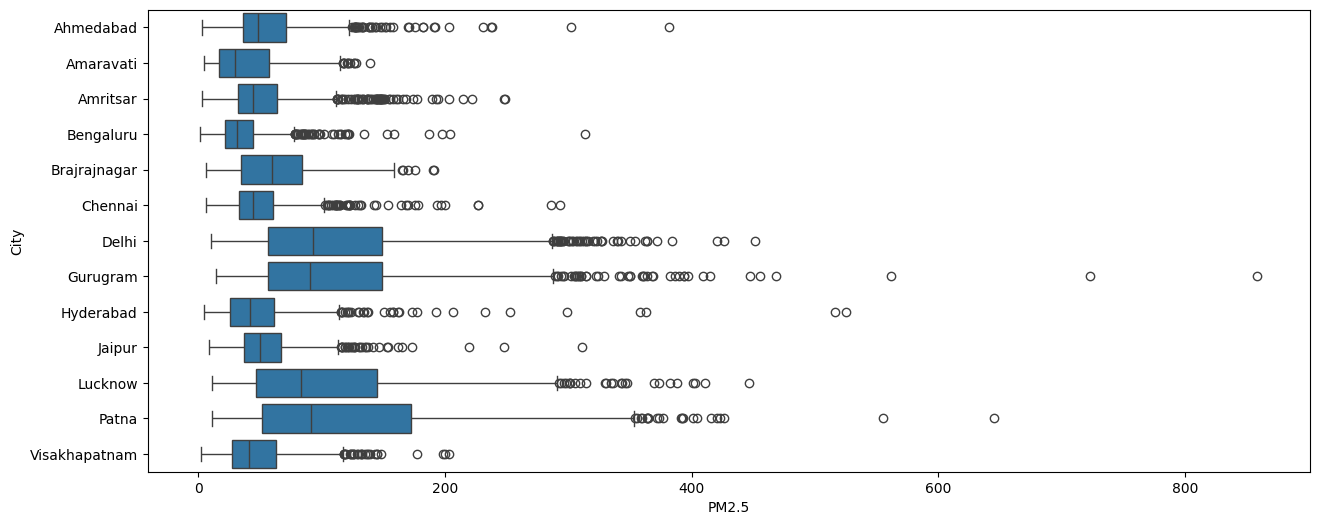

In [65]:
plt.figure(figsize=(15, 6))
sns.boxplot(df, x="PM2.5", y="City")
plt.show()

In [66]:
df["PM2.5_C"] = df.groupby("City")["PM2.5"].transform(remove_outlier)

After Removing Outliers

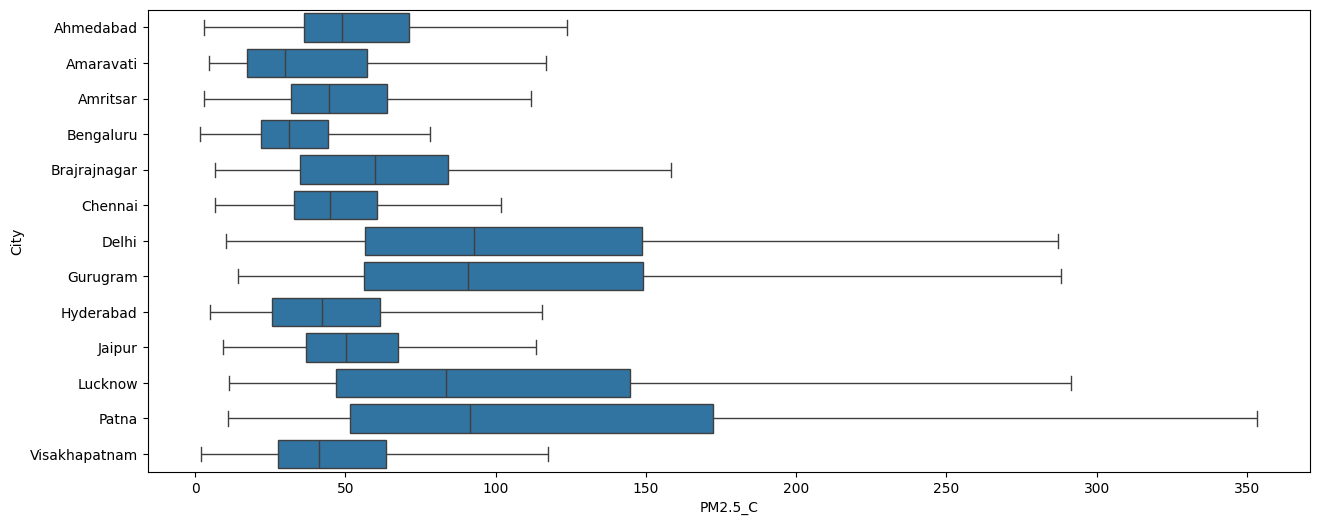

In [67]:
plt.figure(figsize=(15, 6))
sns.boxplot(df, x="PM2.5_C", y="City")
plt.show()

**PM10 / City**

Before Removing Oultiers

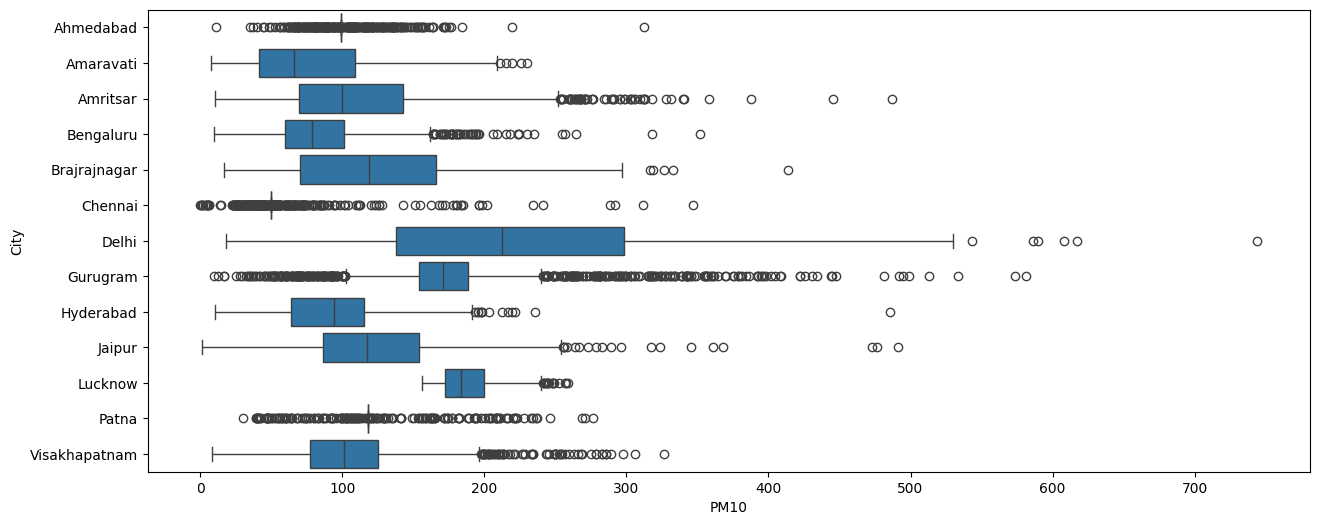

In [68]:
plt.figure(figsize=(15, 6))
sns.boxplot(df, x="PM10", y="City")
plt.show()

In [69]:
df["PM10_C"] = df.groupby("City")["PM10"].transform(remove_outlier)

After Removing Outliers

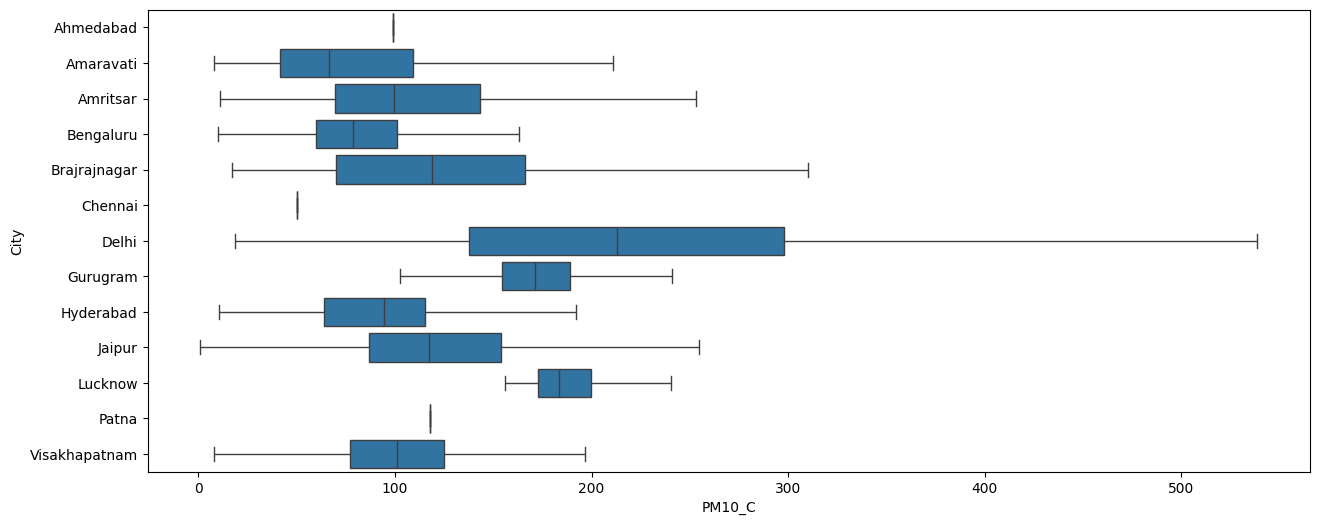

In [70]:
plt.figure(figsize=(15, 6))
sns.boxplot(df, x="PM10_C", y="City")
plt.show()

**NO / City**

Before Removing Outliers

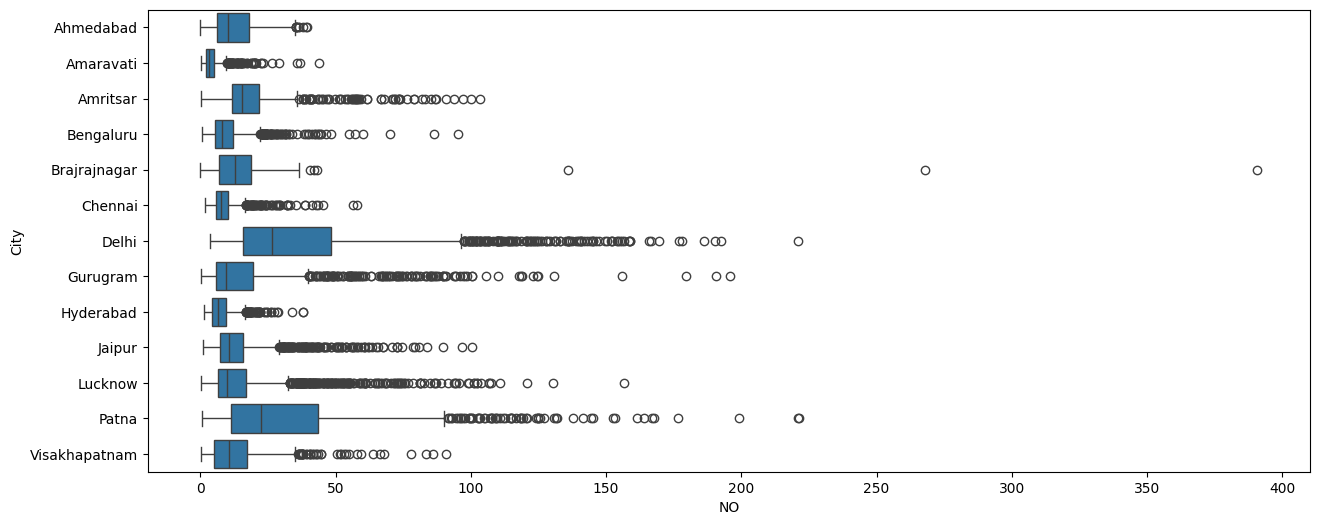

In [71]:
plt.figure(figsize=(15, 6))
sns.boxplot(df, x="NO", y="City")
plt.show()

In [72]:
df["NO_C"] = df.groupby("City")["NO"].transform(remove_outlier)

After Removing Outliers

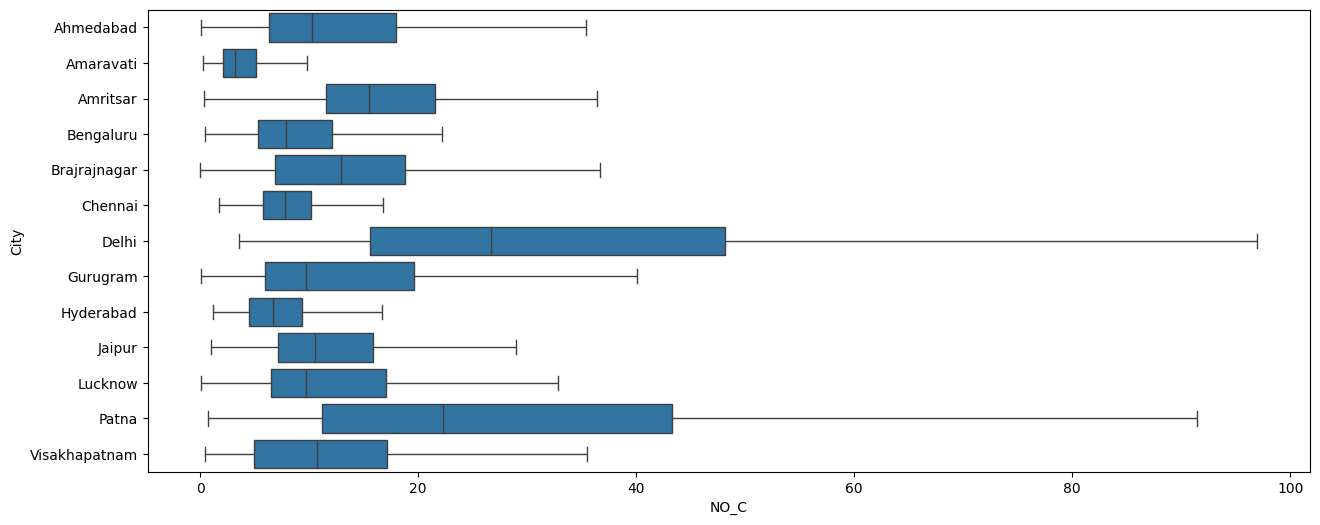

In [73]:
plt.figure(figsize=(15, 6))
sns.boxplot(df, x="NO_C", y="City")
plt.show()

**NO2 / City**

Before Removing Outliers

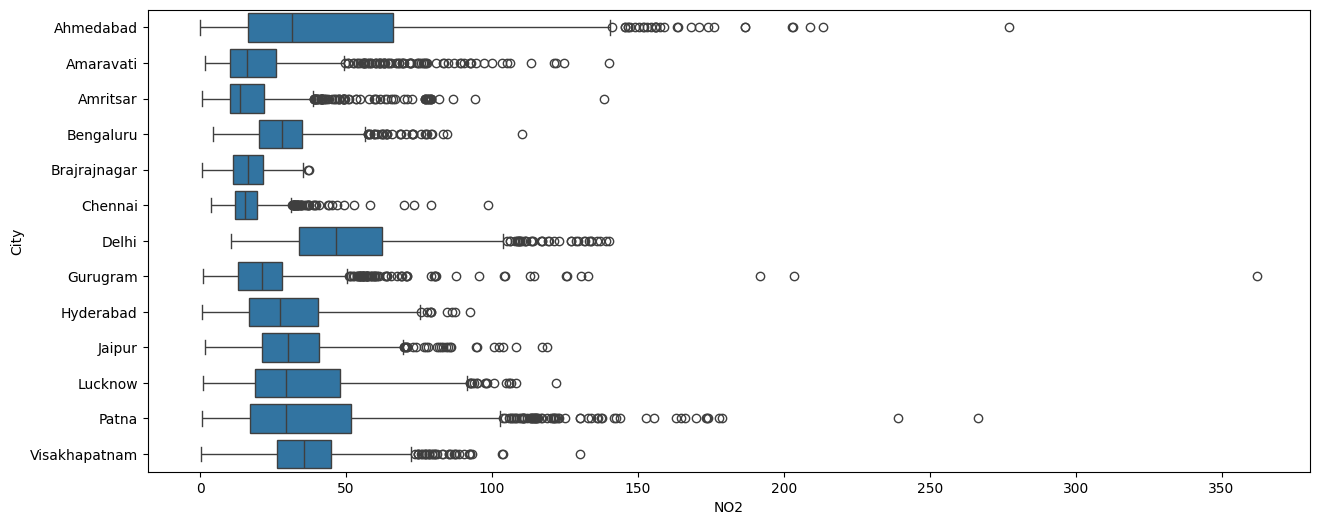

In [74]:
plt.figure(figsize=(15, 6))
sns.boxplot(df, x="NO2", y="City")
plt.show()

In [75]:
df["NO2_C"] = df.groupby("City")["NO"].transform(remove_outlier)

After Removing Outliers

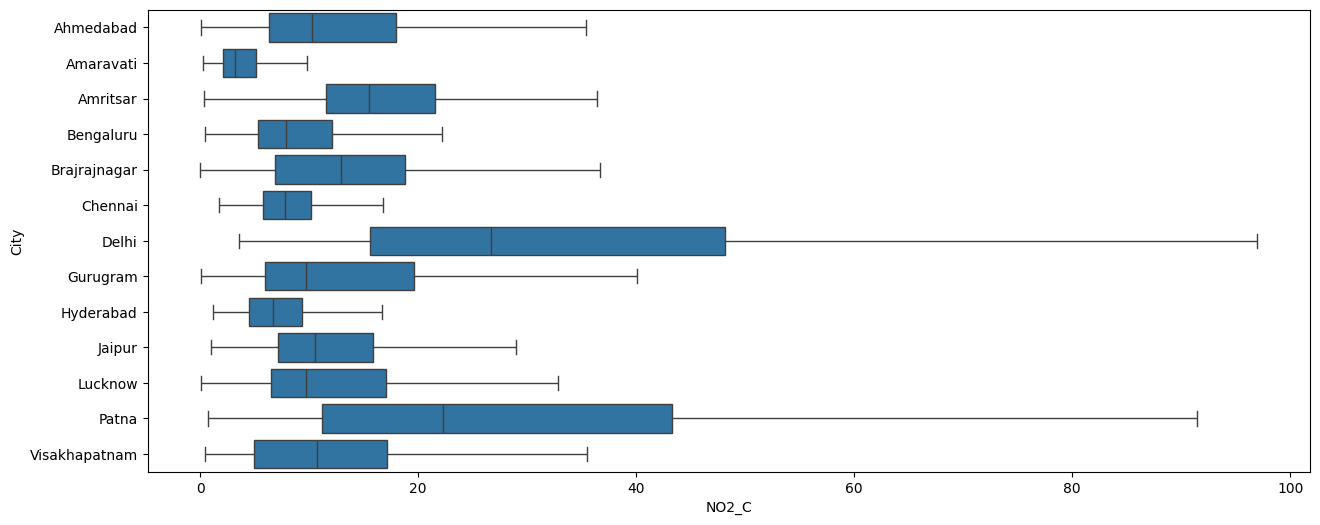

In [76]:
plt.figure(figsize=(15, 6))
sns.boxplot(df, x="NO2_C", y="City")
plt.show()

**NOx / City**

Before Removing Outliers

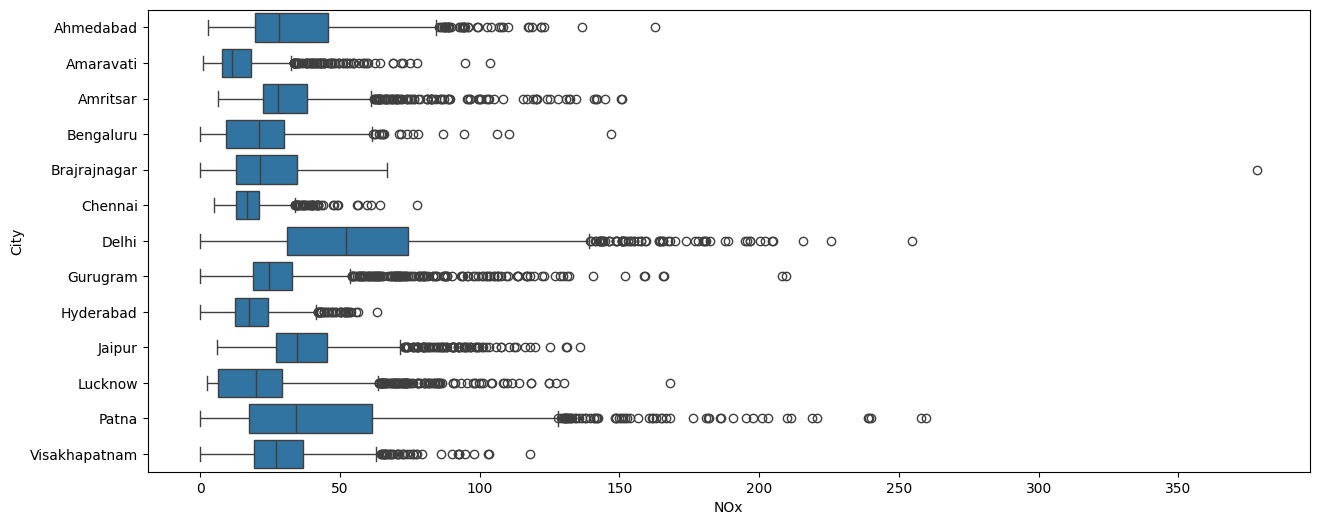

In [77]:
plt.figure(figsize=(15, 6))
sns.boxplot(df, x="NOx", y="City")
plt.show()

In [78]:
df["NOx_C"] = df.groupby("City")["NOx"].transform(remove_outlier)

After Removing Outliers

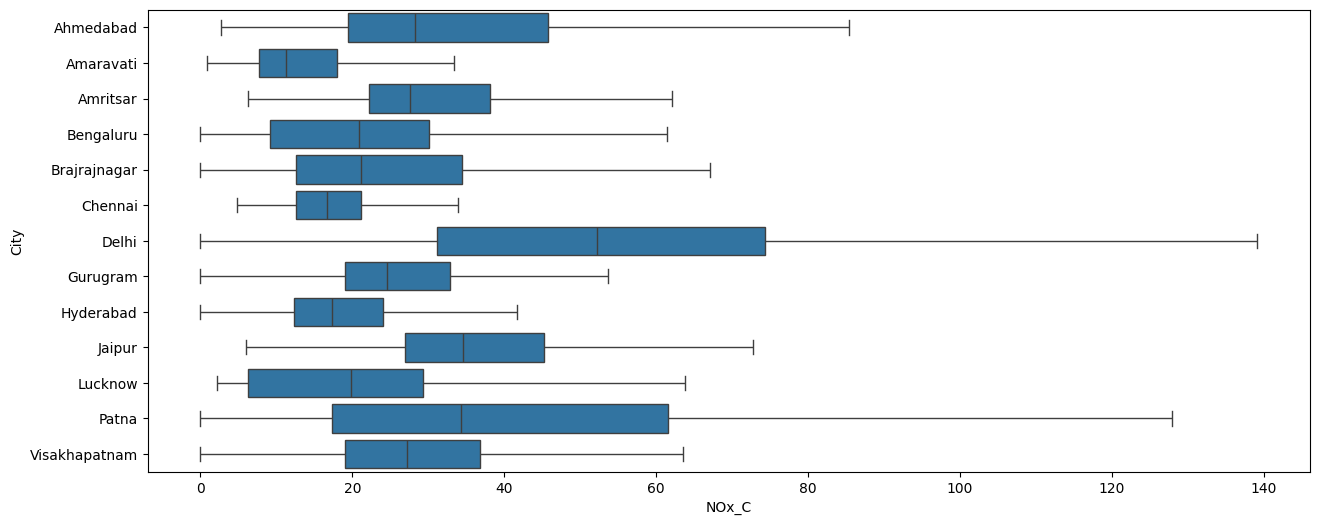

In [79]:
plt.figure(figsize=(15, 6))
sns.boxplot(df, x="NOx_C", y="City")
plt.show()

**NH3 / City**

Before Removing Outliers

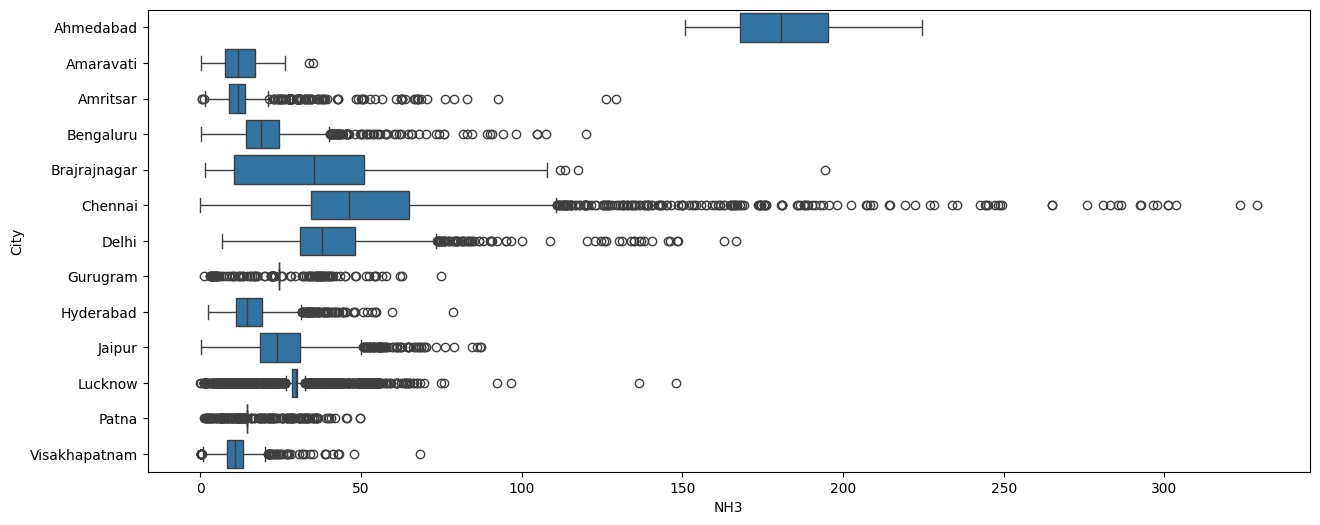

In [80]:
plt.figure(figsize=(15, 6))
sns.boxplot(df, x="NH3", y="City")
plt.show()

In [81]:
df["NH3_C"] = df.groupby("City")["NH3"].transform(remove_outlier)

After Removing Outliers

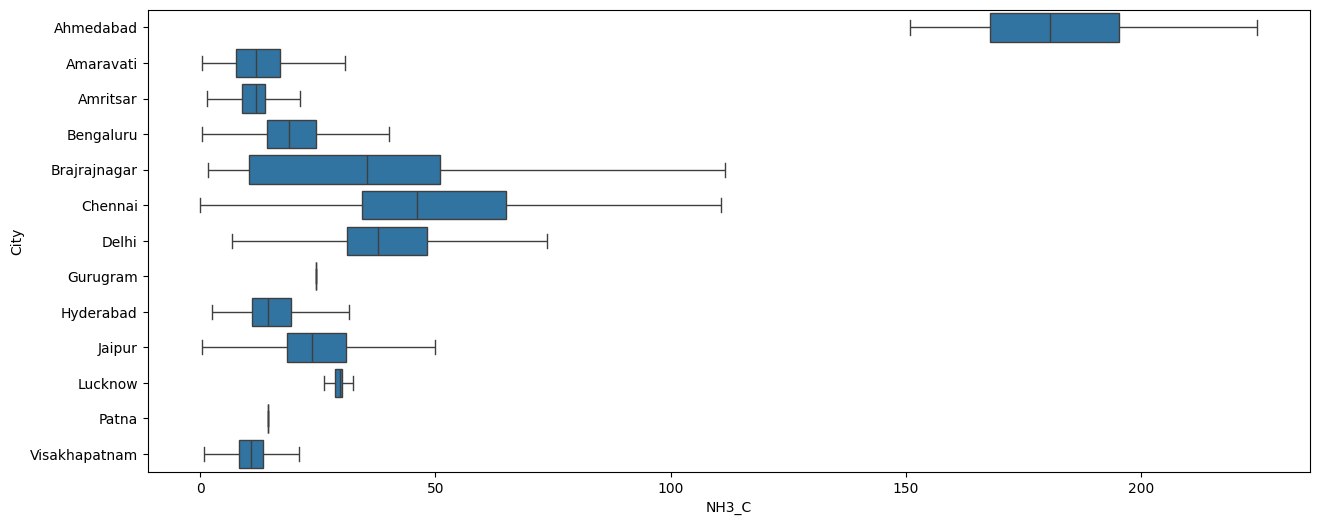

In [82]:
plt.figure(figsize=(15, 6))
sns.boxplot(df, x="NH3_C", y="City")
plt.show()

**CO / City**

Before Removing Outliers

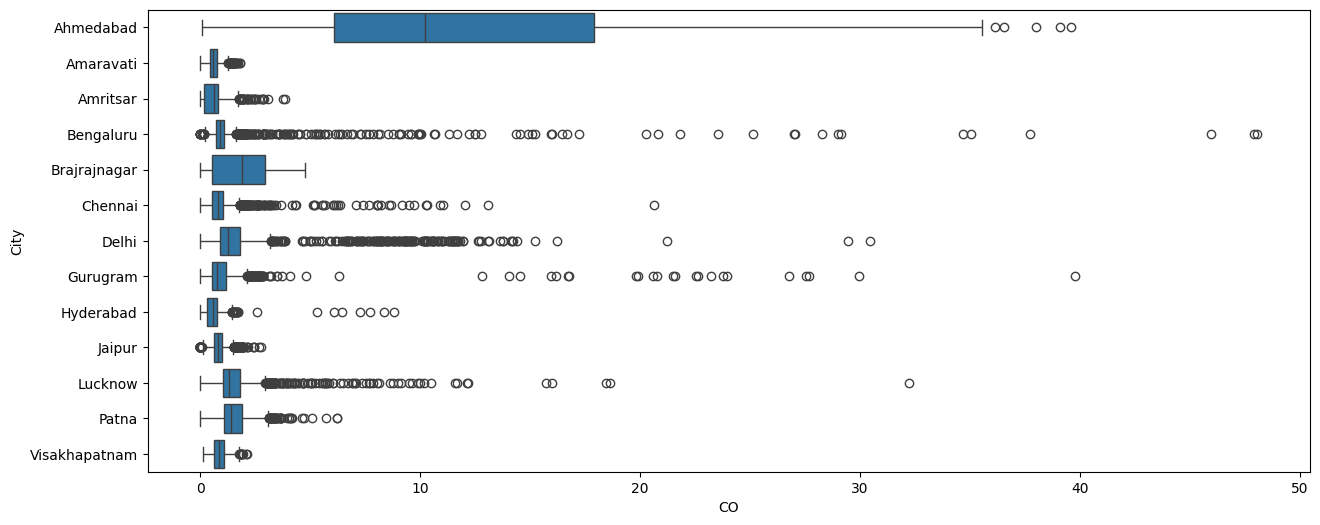

In [83]:
plt.figure(figsize=(15, 6))
sns.boxplot(df, x="CO", y="City")
plt.show()

In [84]:
df["CO_C"] = df.groupby("City")["CO"].transform(remove_outlier)

After Removing Outliers

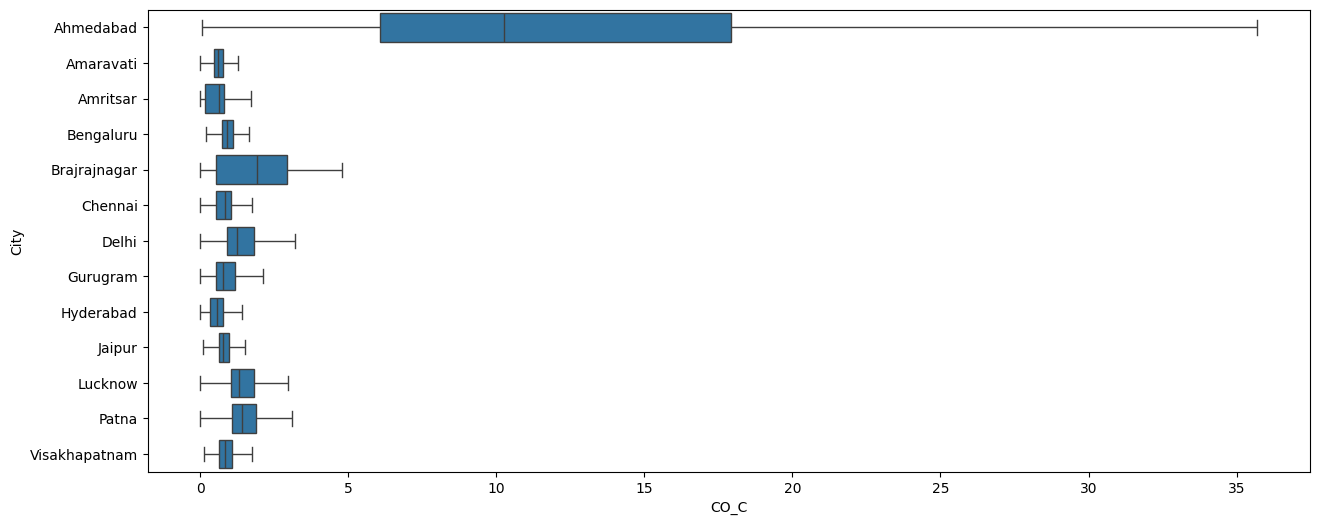

In [85]:
plt.figure(figsize=(15, 6))
sns.boxplot(df, x="CO_C", y="City")
plt.show()

**SO2 / City**

Before Removing Outliers

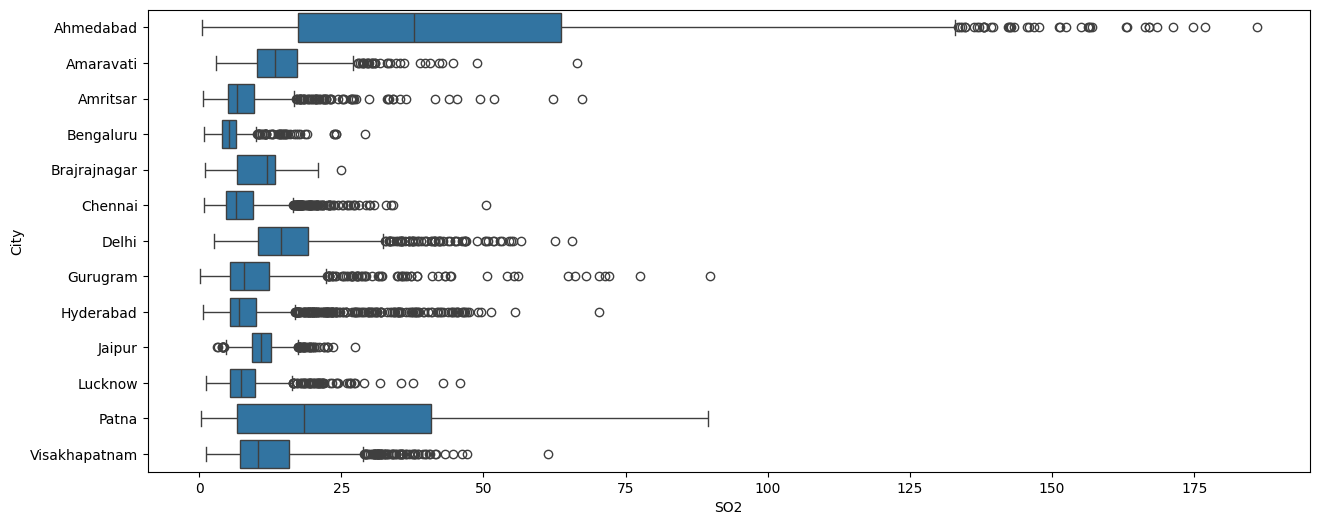

In [86]:
plt.figure(figsize=(15, 6))
sns.boxplot(df, x="SO2", y="City")
plt.show()

In [87]:
df["SO2_C"] = df.groupby("City")["SO2"].transform(remove_outlier)

After Removing Outliers

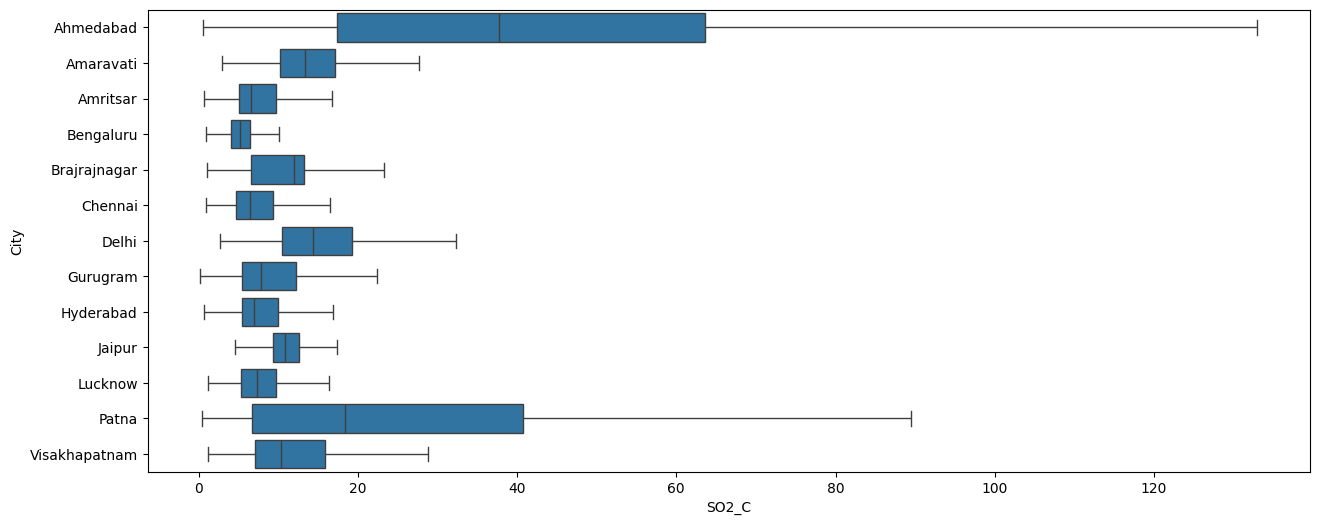

In [88]:
plt.figure(figsize=(15, 6))
sns.boxplot(df, x="SO2_C", y="City")
plt.show()

**O3 / City**

Before Removing Outliers

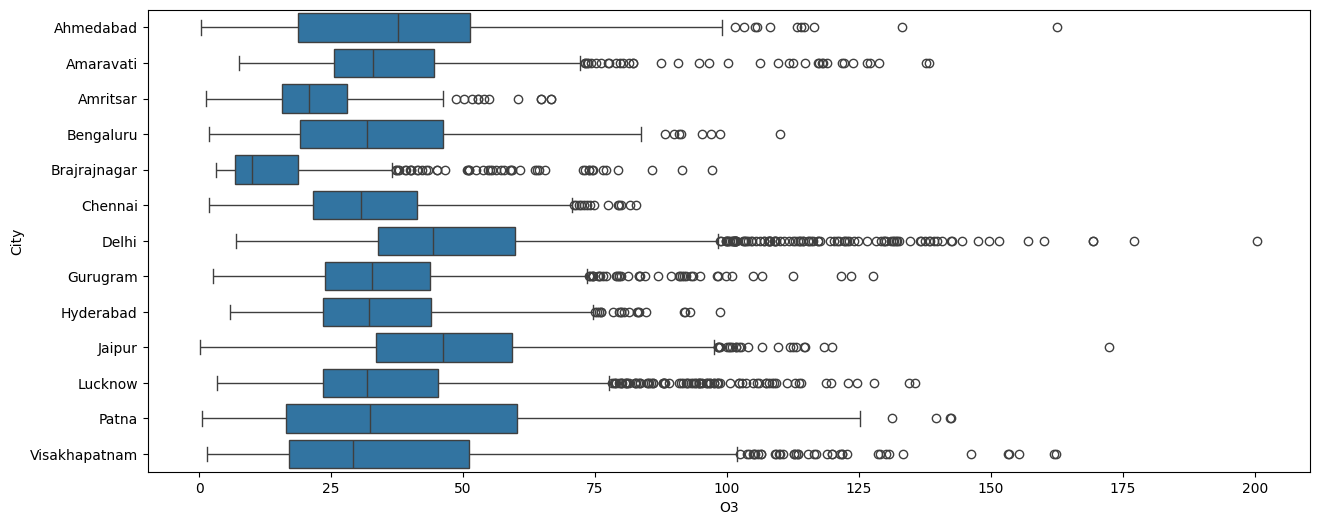

In [89]:
plt.figure(figsize=(15, 6))
sns.boxplot(df, x="O3", y="City")
plt.show()

In [90]:
df["O3_C"] = df.groupby("City")["O3"].transform(remove_outlier)

After Removing Outliers

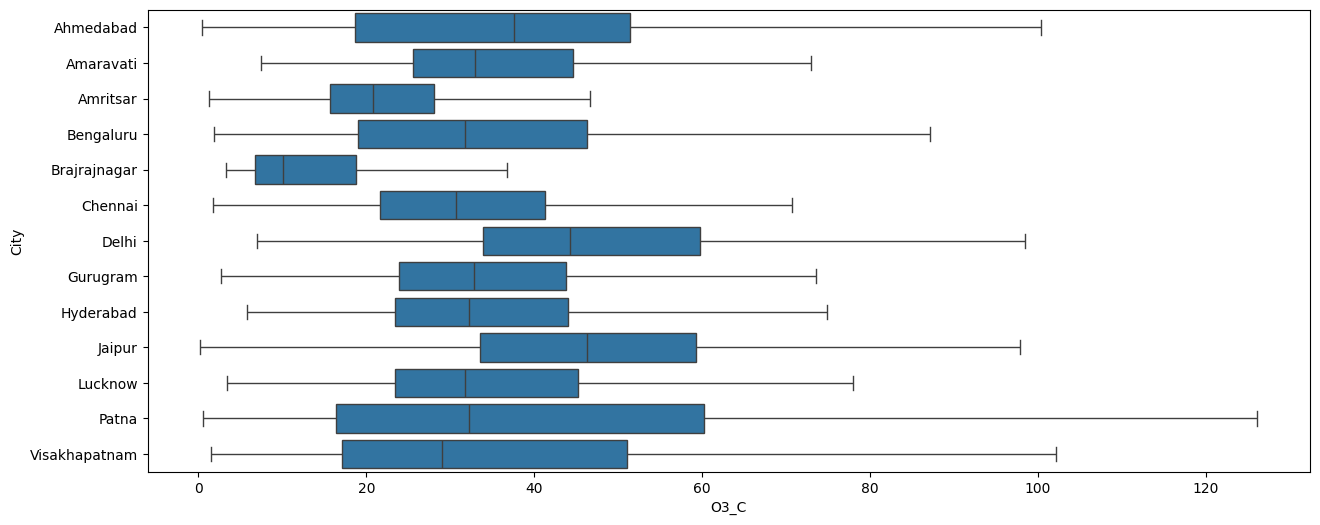

In [91]:
plt.figure(figsize=(15, 6))
sns.boxplot(df, x="O3_C", y="City")
plt.show()

**Benzene / City**

Before Removing Outliers

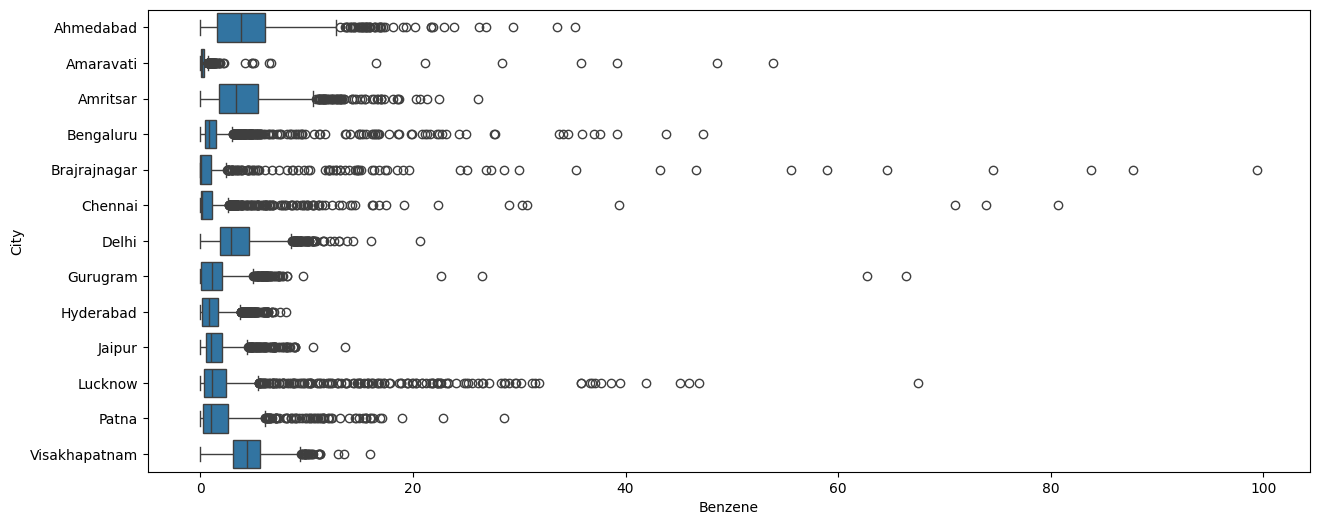

In [92]:
plt.figure(figsize=(15, 6))
sns.boxplot(df, x="Benzene", y="City")
plt.show()

In [93]:
df["Benzen_C"] = df.groupby("City")["Benzene"].transform(remove_outlier)

After Removing Outliers

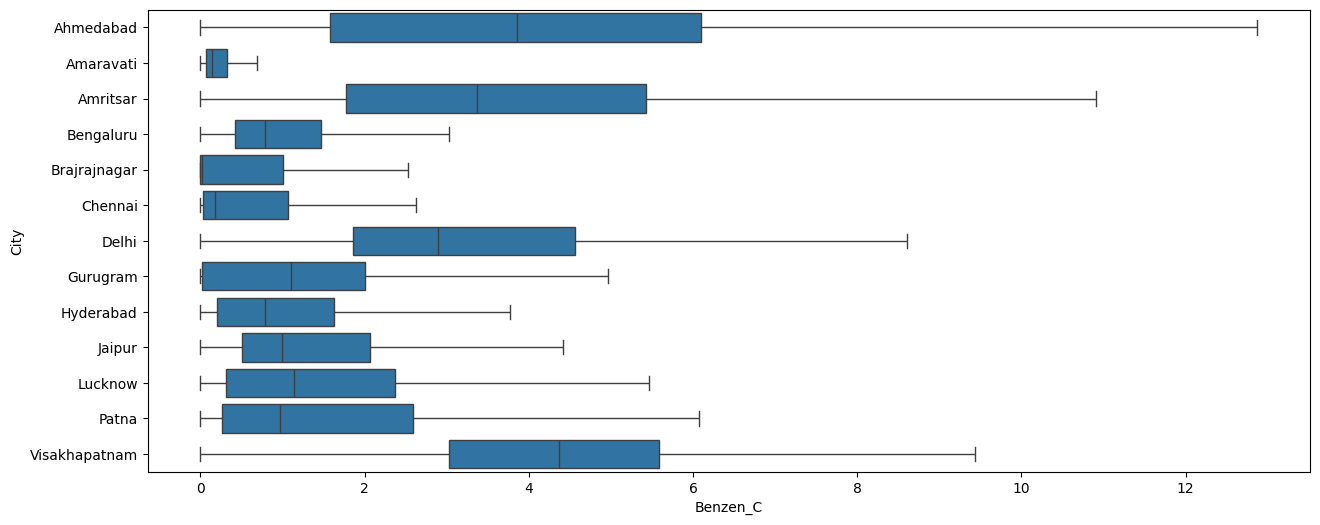

In [94]:
plt.figure(figsize=(15, 6))
sns.boxplot(df, x="Benzen_C", y="City")
plt.show()

**Toluene / City**

Before Removing Outliers

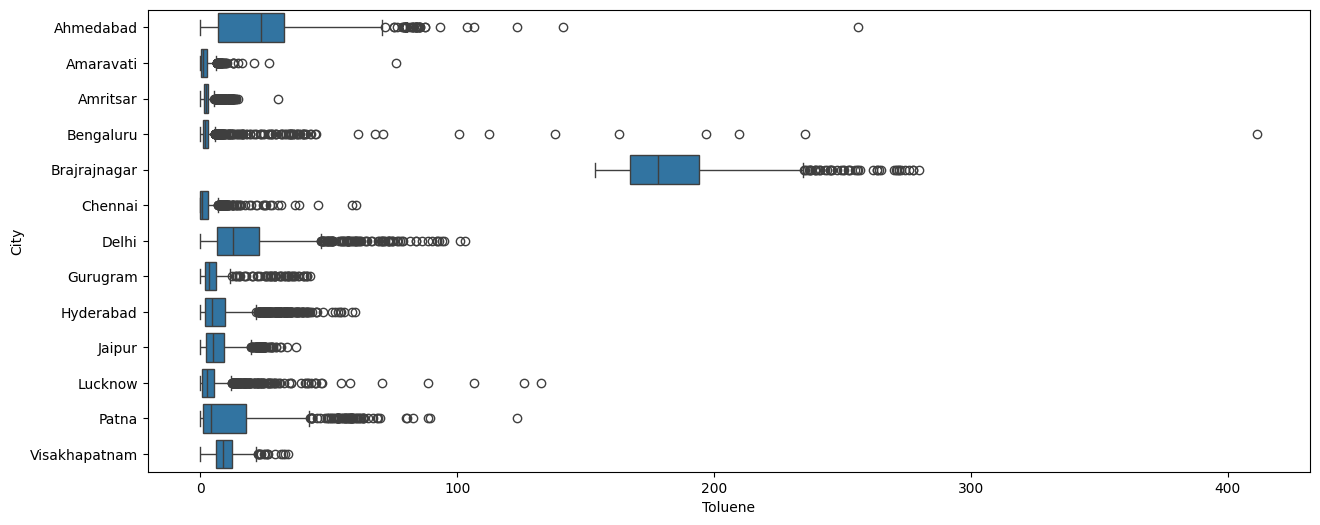

In [95]:
plt.figure(figsize=(15, 6))
sns.boxplot(df, x="Toluene", y="City")
plt.show()

In [96]:
df["Toluene_C"] = df.groupby("City")["Toluene"].transform(remove_outlier)

After Removing Outliers

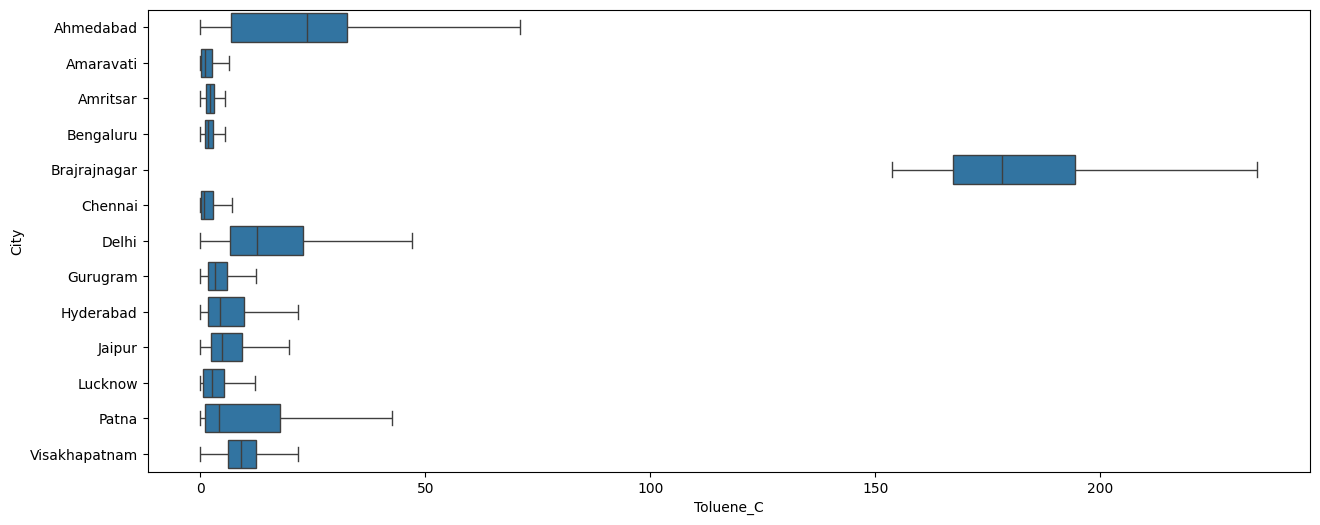

In [97]:
plt.figure(figsize=(15, 6))
sns.boxplot(df, x="Toluene_C", y="City")
plt.show()

**Xylene / City**

Before Removing Outliers

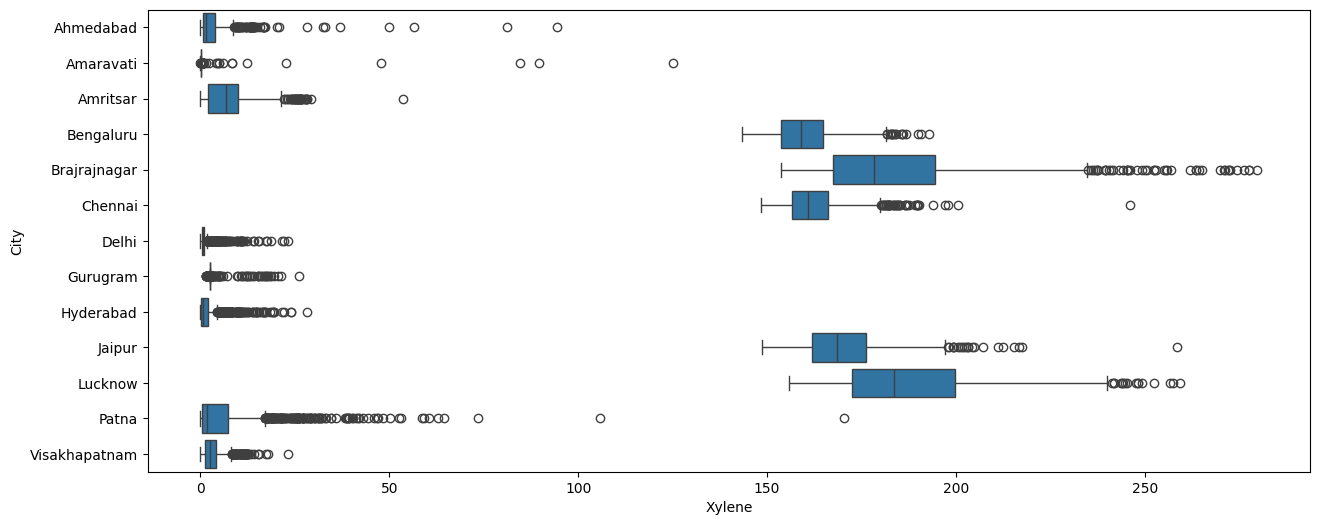

In [98]:
plt.figure(figsize=(15, 6))
sns.boxplot(df, x="Xylene", y="City")
plt.show()

In [99]:
df["Xylene_C"] = df.groupby("City")["Xylene"].transform(remove_outlier)

After Removing Outliers

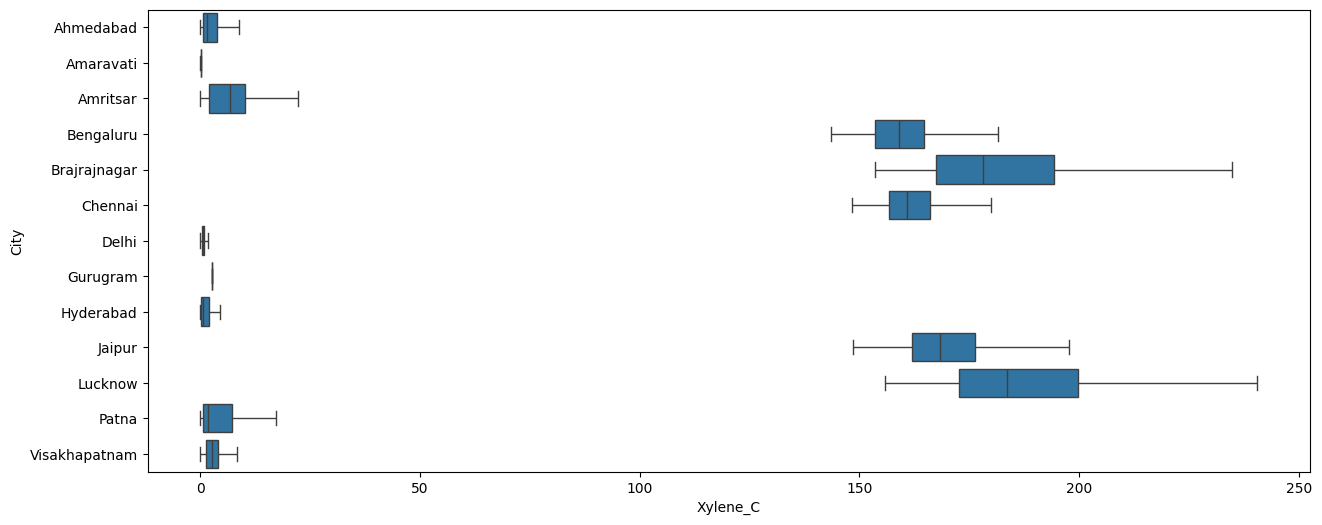

In [100]:
plt.figure(figsize=(15, 6))
sns.boxplot(df, x="Xylene_C", y="City")
plt.show()

**AQI / City**

Before Removing Outliers

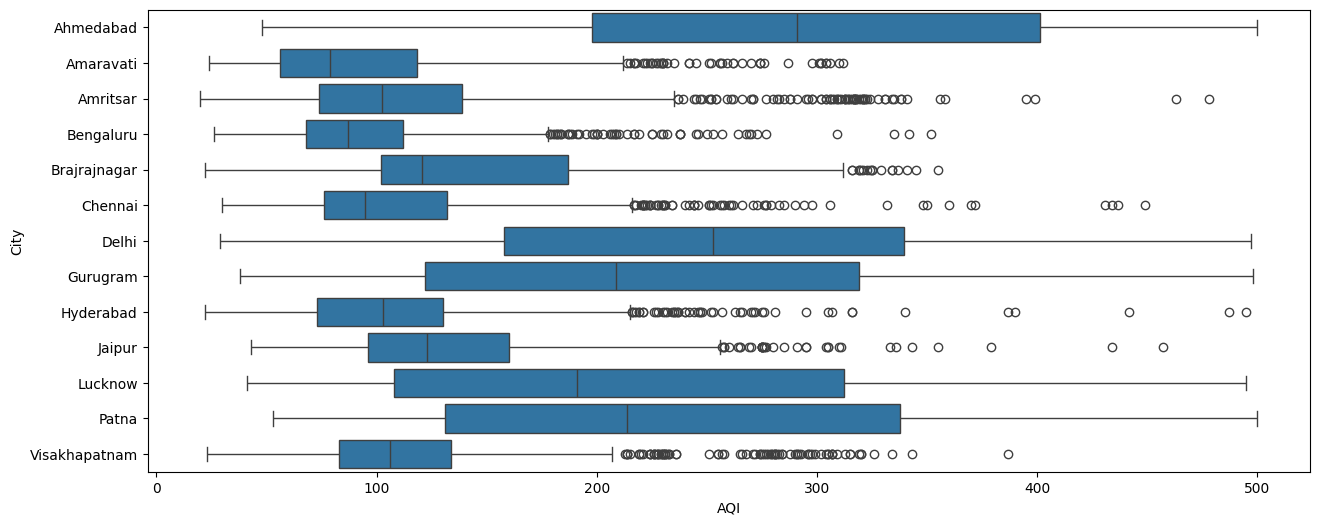

In [101]:
plt.figure(figsize=(15, 6))
sns.boxplot(df, x="AQI", y="City")
plt.show()

In [102]:
df["AQI_C"] = df.groupby("City")["AQI"].transform(remove_outlier)

After Removing Outliers

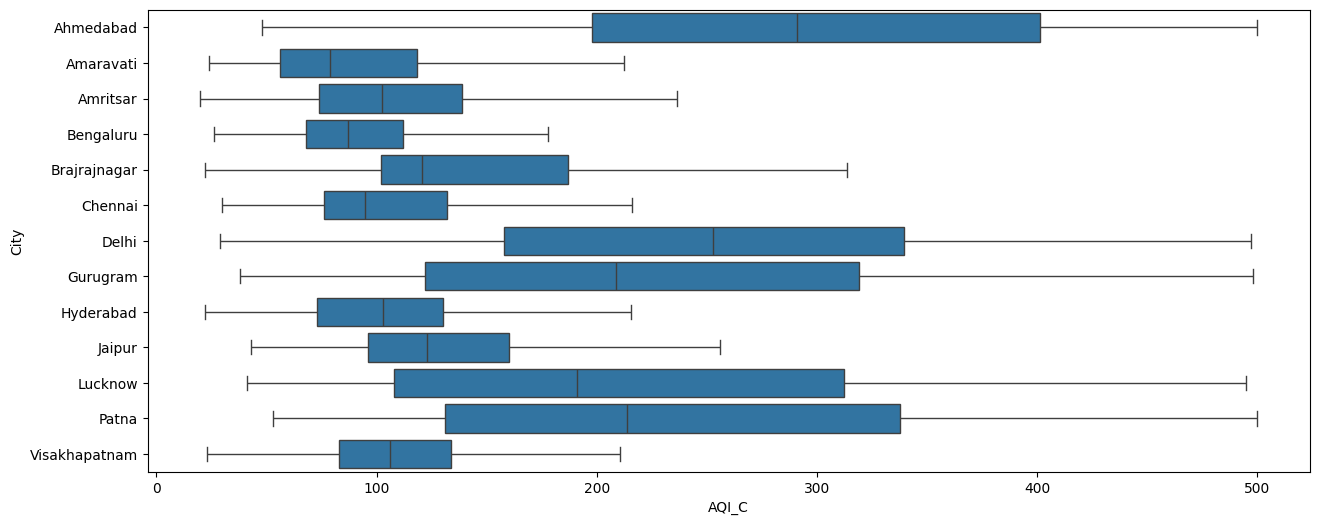

In [103]:
plt.figure(figsize=(15, 6))
sns.boxplot(df, x="AQI_C", y="City")
plt.show()

## Dataset After Cleaning Process

In [104]:
df

City       Date  PM2.5   PM10     NO    NO2    NOx  \
28         Ahmedabad 2015-01-29  83.13  99.05   6.93  28.71  33.72   
29         Ahmedabad 2015-01-30  79.84  99.05  13.85  28.68  41.08   
34         Ahmedabad 2015-02-04  80.65  99.05   2.37  22.83  24.00   
35         Ahmedabad 2015-02-05  58.36  99.05   2.60  21.39  23.31   
36         Ahmedabad 2015-02-06  79.29  99.05   1.16  26.94  26.83   
...              ...        ...    ...    ...    ...    ...    ...   
29525  Visakhapatnam 2020-06-26   7.63  32.27   5.91  23.27  17.19   
29526  Visakhapatnam 2020-06-27  15.02  50.94   7.68  25.06  19.54   
29527  Visakhapatnam 2020-06-28  24.38  74.09   3.42  26.06  16.53   
29528  Visakhapatnam 2020-06-29  22.91  65.73   3.45  29.53  18.33   
29529  Visakhapatnam 2020-06-30  16.64  49.97   4.05  29.26  18.80   

              NH3     CO    SO2  ...  NO2_C  NOx_C       NH3_C   CO_C  SO2_C  \
28     174.994000   6.93  49.52  ...   6.93  33.72  174.994000   6.93  49.52   
29     186.717333  13.85  48.49  ...  13.85  41.08  186.717333  13.85  48.49   
34     174.620000   2.37  25.73  ...   2.37  24.00  174.620000   2.37  25.73   
35     164.300667   2.60  32.66  ...   2.60  23.31  164.300667   2.60  32.66   
36     171.609333   1.16  67.41  ...   1.16  26.83  171.609333   1.16  67.41   
...           ...    ...    ...  ...    ...    ...         ...    ...    ...   
29525   11.150000   0.46   6.87  ...   5.91  17.19   11.150000   0.46   6.87   
29526   12.470000   0.47   8.55  ...   7.68  19.54   12.470000   0.47   8.55   
29527   11.990000   0.52  12.72  ...   3.42  16.53   11.990000   0.52  12.72   
29528   10.710000   0.48   8.42  ...   3.45  18.33   10.710000   0.48   8.42   
29529   10.030000   0.52   9.84  ...   4.05  18.80   10.030000   0.52   9.84   

        O3_C  Benzen_C  Toluene_C  Xylene_C  AQI_C  
28     59.76      0.02       0.00      3.14  209.0  
29     97.07      0.04       0.00      4.81  328.0  
34     47.30      0.00       0.00      0.00  294.0  
35     53.54      0.00       0.00      0.00  149.0  
36     59.30      0.00       0.00      0.00  190.0  
...      ...       ...        ...       ...    ...  
29525  19.90      1.45       5.37      1.45   47.0  
29526  23.30      2.24      12.07      0.73   41.0  
29527  30.14      0.74       2.21      0.38   70.0  
29528  30.96      0.01       0.01      0.00   68.0  
29529  28.30      0.00       0.00      0.00   54.0  

[16923 rows x 32 columns]

In [105]:
df.describe()

Date         PM2.5          PM10  \
count                          16923  16923.000000  16923.000000   
mean   2018-05-09 21:08:17.145896192     71.616353    126.280429   
min              2015-01-01 00:00:00      1.720000      0.210000   
25%              2017-04-14 00:00:00     33.520000     70.620000   
50%              2018-07-24 00:00:00     52.760000    112.780000   
75%              2019-07-15 00:00:00     84.690000    171.030000   
max              2020-07-01 00:00:00    858.730000    743.980000   
std                              NaN     60.586244     76.102385   

                 NO           NO2           NOx           NH3            CO  \
count  16923.000000  16923.000000  16923.000000  16923.000000  16923.000000   
mean      16.831956     31.599011     30.770152     35.104443      1.824536   
min        0.030000      0.080000      0.000000      0.020000      0.000000   
25%        6.090000     15.900000     14.990000     14.325000      0.620000   
50%       10.190000     26.010000     24.240000     24.120000      0.920000   
75%       18.520000     41.000000     37.580000     36.455000      1.420000   
max      390.680000    362.210000    378.240000    328.890000     48.070000   
std       20.359828     22.361412     26.228592     41.617462      3.716589   

                SO2            O3  ...         NO2_C         NOx_C  \
count  16923.000000  16923.000000  ...  16923.000000  16923.000000   
mean      13.203153     36.692011  ...     15.563369     29.705588   
min        0.210000      0.240000  ...      0.030000      0.000000   
25%        5.830000     21.305000  ...      6.090000     14.990000   
50%        8.900000     32.710000  ...     10.140000     24.240000   
75%       14.290000     47.575000  ...     18.140000     37.010000   
max      186.080000    200.410000  ...     96.970000    139.157500   
std       15.055917     21.719212  ...     16.242418     23.152927   

              NH3_C          CO_C         SO2_C          O3_C      Benzen_C  \
count  16923.000000  16923.000000  16923.000000  16923.000000  16923.000000   
mean      34.029151      1.630816     12.809131     36.223822      1.964689   
min        0.020000      0.000000      0.210000      0.240000      0.000000   
25%       14.500000      0.620000      5.830000     21.305000      0.270000   
50%       24.530000      0.920000      8.900000     32.710000      1.270000   
75%       33.250000      1.420000     14.245000     47.410000      2.920000   
max      224.711333     35.697500    132.975000    126.107500     12.871250   
std       39.176614      3.314047     14.269659     20.362654      2.184230   

          Toluene_C      Xylene_C         AQI_C  
count  16923.000000  16923.000000  16923.000000  
mean      14.613847     71.451487    165.116070  
min        0.000000      0.000000     20.000000  
25%        1.270000      0.870000     88.000000  
50%        3.840000      4.600000    126.000000  
75%       10.295000    163.012833    215.750000  
max      234.833571    240.512527    500.000000  
std       36.585298     83.695440    105.112258  

[8 rows x 30 columns]

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16923 entries, 28 to 29529
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        16923 non-null  object        
 1   Date        16923 non-null  datetime64[ns]
 2   PM2.5       16923 non-null  float64       
 3   PM10        16923 non-null  float64       
 4   NO          16923 non-null  float64       
 5   NO2         16923 non-null  float64       
 6   NOx         16923 non-null  float64       
 7   NH3         16923 non-null  float64       
 8   CO          16923 non-null  float64       
 9   SO2         16923 non-null  float64       
 10  O3          16923 non-null  float64       
 11  Benzene     16923 non-null  float64       
 12  Toluene     16923 non-null  float64       
 13  Xylene      16923 non-null  float64       
 14  AQI         16923 non-null  float64       
 15  AQI_Bucket  16923 non-null  object        
 16  Year        16923 non-null

# Saving Cleaned Dataset to CSV

In [107]:
path = "CleanedData.csv"
df.to_csv(path)

# Creating Sub-Dataset per City
* Inorder to check for insights per city.

In [108]:
Ahmedabad = df[df["City"] == "Ahmedabad"]
Amaravati = df[df["City"] == "Amaravati"]
Amritsar = df[df["City"] == "Amritsar"]
Bengaluru = df[df["City"] == "Bengaluru"]
Brajrajnagar = df[df["City"] == "Brajrajnagar"]
Chennai = df[df["City"] == "Chennai"]
Delhi = df[df["City"] == "Delhi"]
Gurugram = df[df["City"] == "Gurugram"]
Hyderabad = df[df["City"] == "Hyderabad"]
Jaipur = df[df["City"] == "Jaipur"]
Lucknow = df[df["City"] == "Lucknow"]
Patna = df[df["City"] == "Patna"]
Visakhapatnam = df[df["City"] == "Visakhapatnam"]

# Time Series Analysis

* ## PM2.5 Time Analysis
* Visualize PM2.5 Average Production over Time (each day from 2015 to 2020)

Insights:
* 2015 has some of the higest PM2.5 amounts recorded over the past 6 years.
* The Average PM2.5 amount decreased over the past 6 years, making 2020 the year with the least PM2.5 amount produced.
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

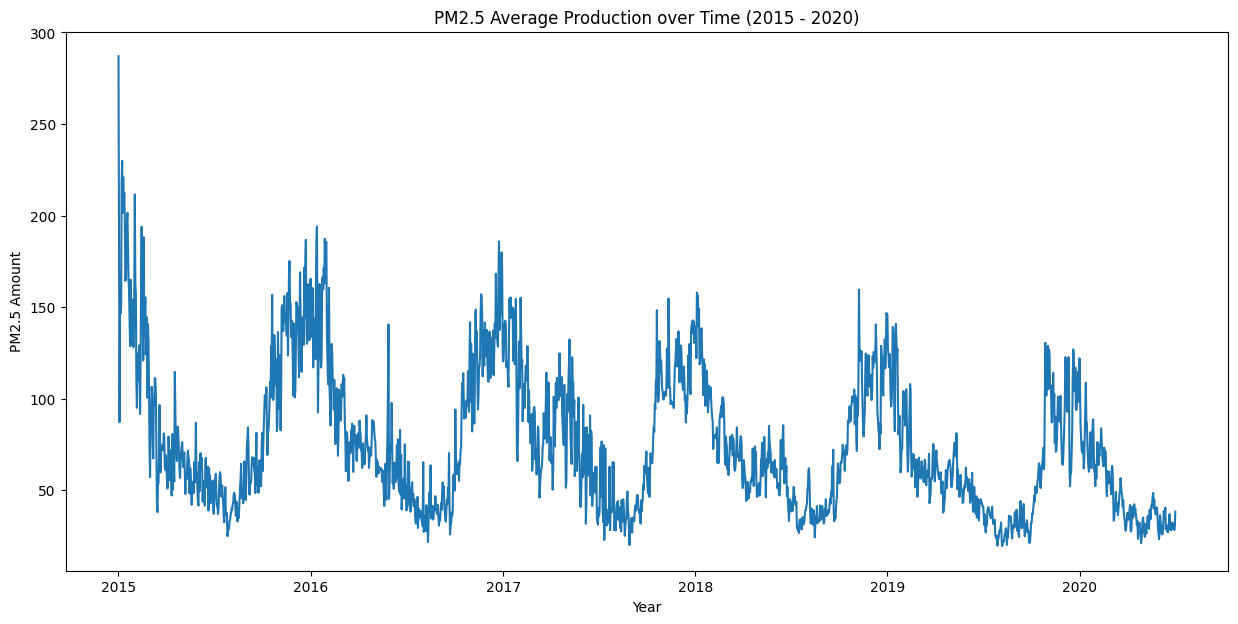

In [109]:
group = df.groupby("Date")["PM2.5_C"].mean()
plt.figure(figsize=(15, 7))
plt.plot(group)
plt.title("PM2.5 Average Production over Time (2015 - 2020)")
plt.xlabel("Year")
plt.ylabel("PM2.5 Amount")
plt.show()

* ## PM2.5 Yearly Analysis
* We Analyze the average PM2.5 production per year (2015 - 2020).
* Only included the cities that are recorded in the time range (2015 - 2020) for fair analysis.

Insights:
* 2016 has the higest Average PM2.5 amount among the recorded years.
* There is a significant decrease in the average amount of PM2.5 in the years (2019, 2020)
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

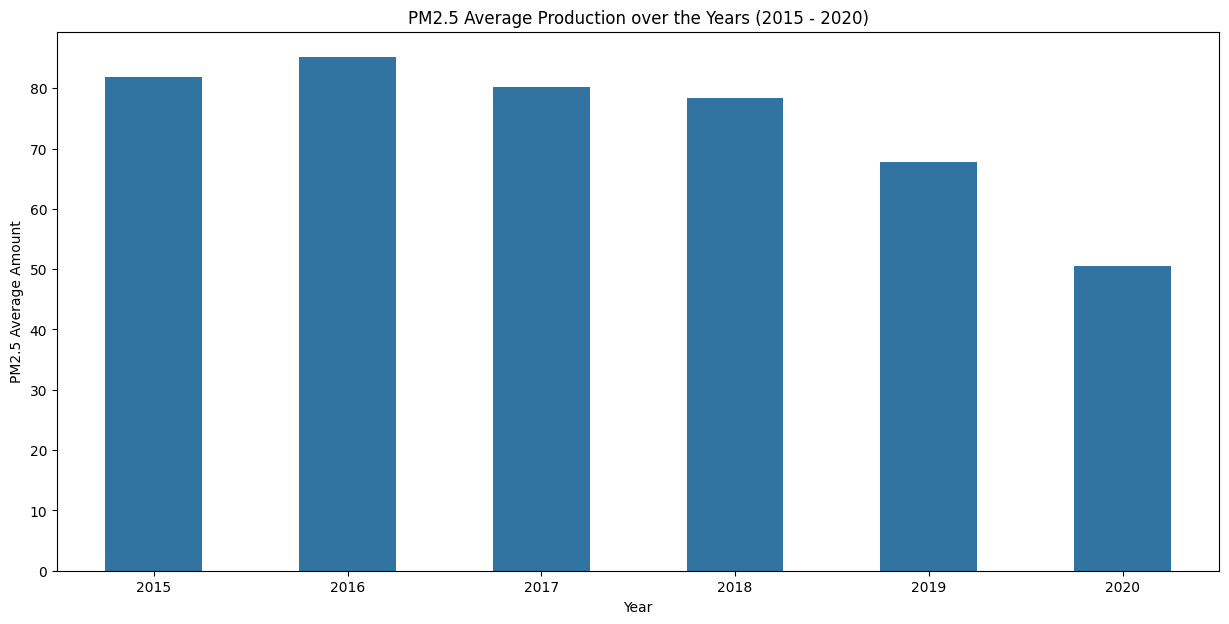

In [111]:
cities = df.groupby("City")["Year"].nunique()[lambda x: x == 6].index.tolist()
sub_df = df[df["City"].isin(cities)]
group = pd.DataFrame(sub_df.groupby("Year")["PM2.5_C"].mean())
plt.figure(figsize=(15, 7))
sns.barplot(data=group, width=.5, x="Year", y="PM2.5_C")
plt.title("PM2.5 Average Production over the Years (2015 - 2020)")
plt.xlabel("Year")
plt.ylabel("PM2.5 Average Amount")
plt.show()

* ## PM2.5 Monthly Analysis
* Analyze the average production of PM2.5 per month for the recorded years (2015 - 2020).

Insights:
* December is the month with the highest recorded average amount of PM2.5 produced over the years (NewYear), January continues to be the month with the second highest average.
* August is the month with the least recorded average amount of PM2.5 produced over the years.
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

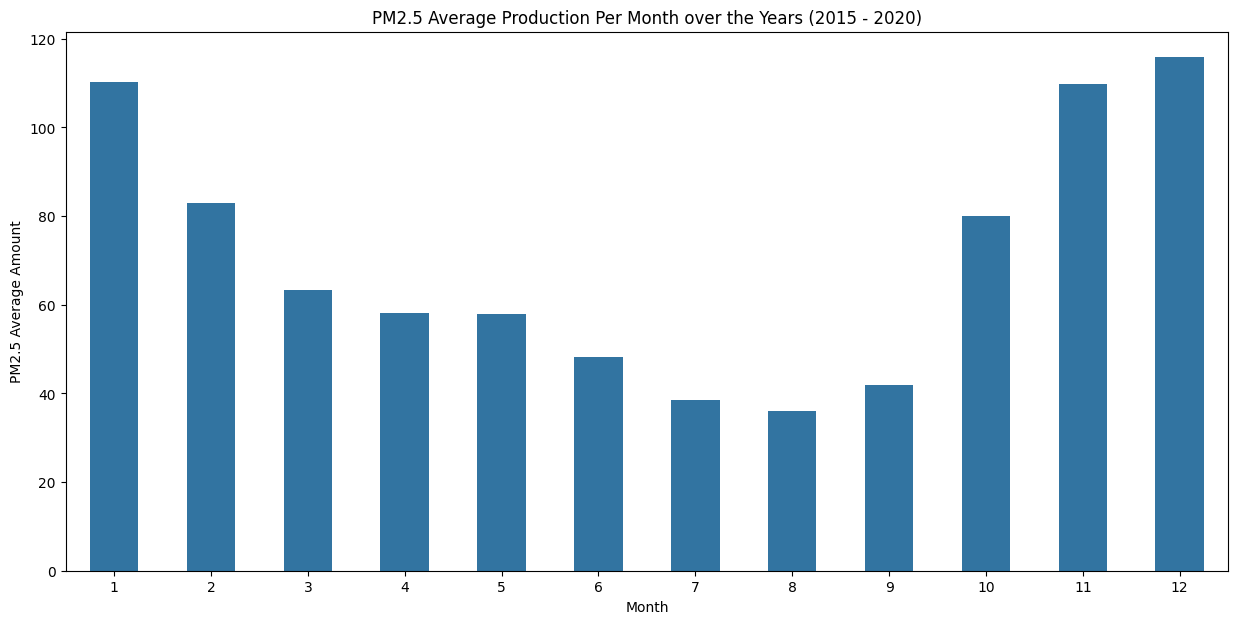

In [ ]:
group = pd.DataFrame(df.groupby("Month")["PM2.5_C"].mean())
plt.figure(figsize=(15, 7))
sns.barplot(data=group, width=.5, x="Month", y="PM2.5_C")
plt.title("PM2.5 Average Production Per Month over the Years (2015 - 2020)")
plt.xlabel("Month")
plt.ylabel("PM2.5 Average Amount")
plt.show()

* # PM2.5 Per City
* Analyze the Average Production of PM2.5 per city per year (Not A Specific year range).

* Ahmedabad

Insights:
* 2017 was the year with the highest amount producted in Ahmedabad.
* 2020 (least amount produced).
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

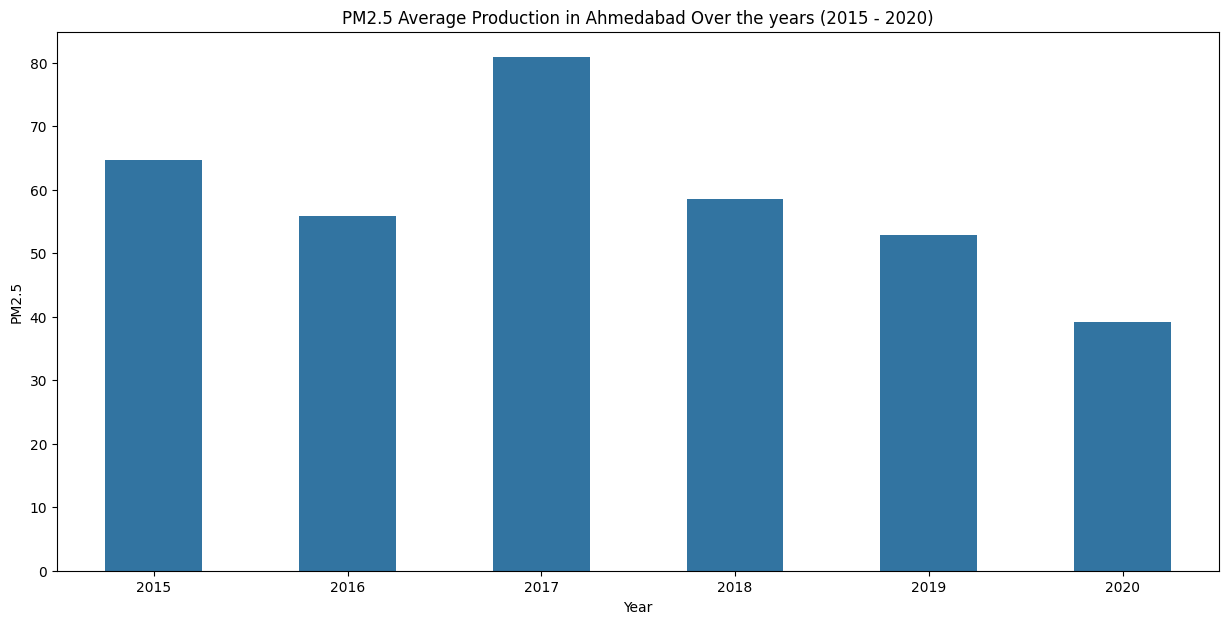

In [113]:
group = pd.DataFrame(Ahmedabad.groupby("Year")["PM2.5_C"].mean())
plt.figure(figsize=(15, 7))
sns.barplot(data=group, width=.5, x="Year", y="PM2.5_C")
plt.ylabel("PM2.5")
plt.title("PM2.5 Average Production in Ahmedabad Over the years (2015 - 2020)")
plt.show()

* Amaravati City

Insights: [2017 - 2020]
* 2017 (Highest amount produced in Amaravati city).
* 2020 (Least amount produced).
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

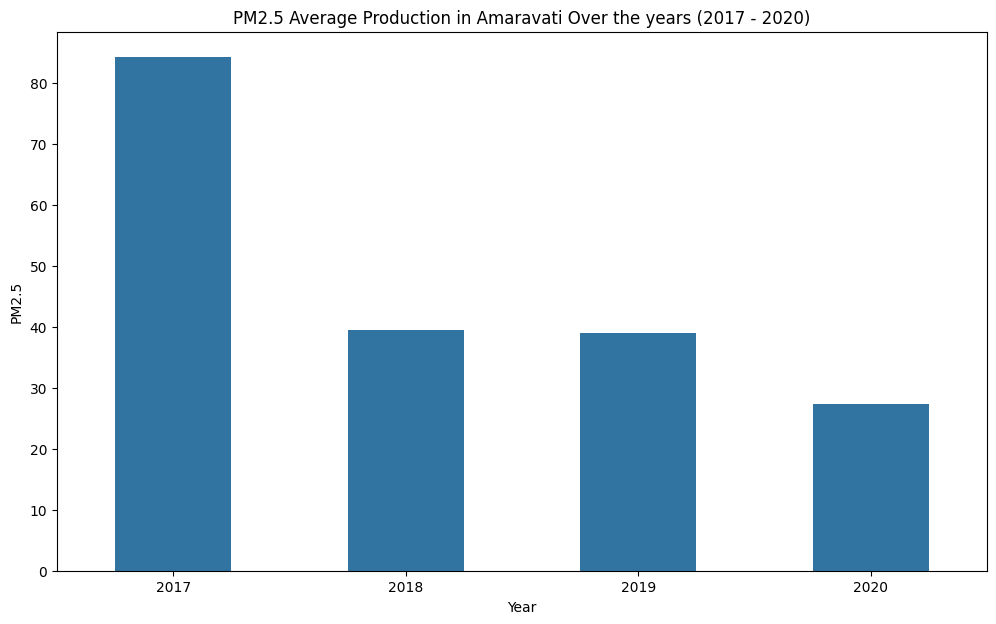

In [114]:
group = pd.DataFrame(Amaravati.groupby("Year")["PM2.5_C"].mean())
plt.figure(figsize=(12, 7))
sns.barplot(data=group, width=.5, x="Year", y="PM2.5_C")
plt.ylabel("PM2.5")
plt.title("PM2.5 Average Production in Amaravati Over the years (2017 - 2020)")
plt.show()

* Amritsar City

Insights:
* 2017 (Highest amount produced in Amritsar city).
* 2020 (Least amount produced).
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Text(0.5, 1.0, 'PM2.5 Average Production in Amritsar Over the years (2017 - 2020)')

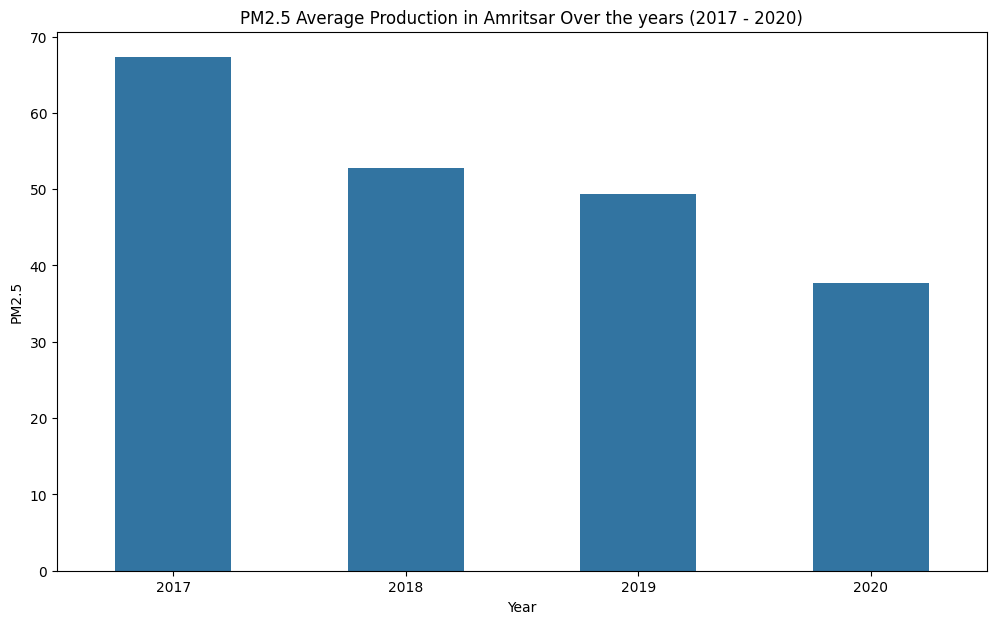

In [115]:
group = pd.DataFrame(Amritsar.groupby("Year")["PM2.5_C"].mean())
plt.figure(figsize=(12, 7))
sns.barplot(data=group, width=.5, x="Year", y="PM2.5_C")
plt.ylabel("PM2.5")
plt.title("PM2.5 Average Production in Amritsar Over the years (2017 - 2020)")

* Bengaluru City

Insights:
* 2016 (Highest amount produced in Bengaluru city).
* 2017 (Least amount produced).
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

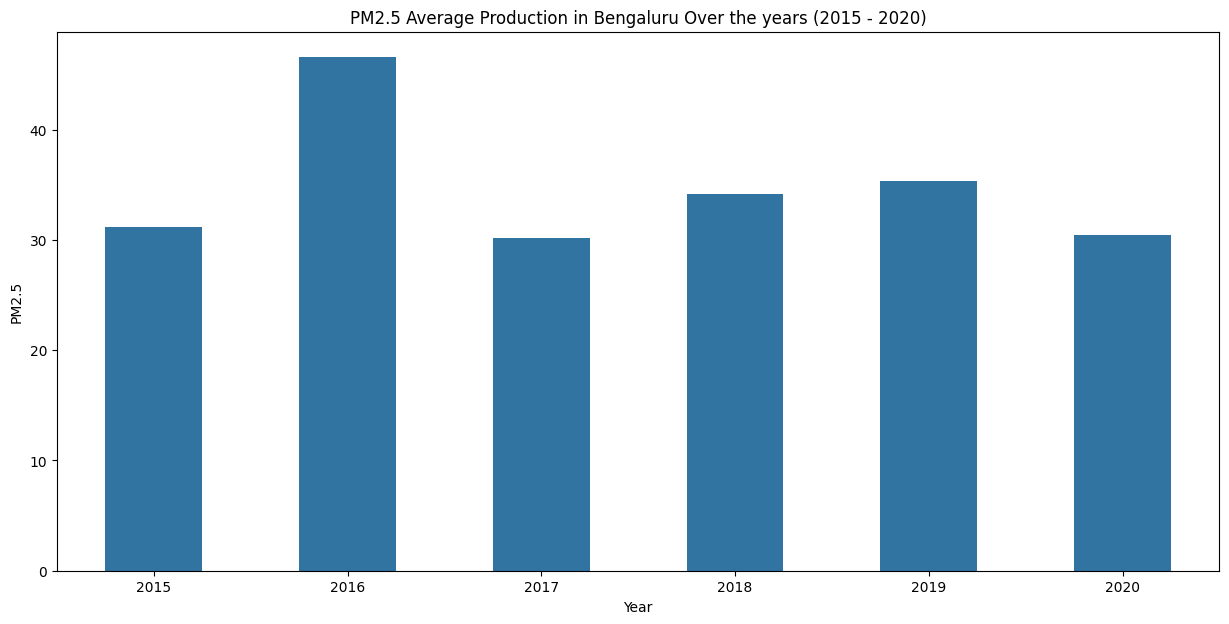

In [ ]:
group = Bengaluru.groupby("Year")["PM2.5_C"].mean()
plt.figure(figsize=(15, 7))
sns.barplot(data=group, width=.5)
plt.ylabel("PM2.5")
plt.title("PM2.5 Average Production in Bengaluru Over the years (2015 - 2020)")
plt.show()

* Brajrajnagar City

Insights: [2017 - 2020]
* 2017 (Highest amount produced in Amaravati city).
* 2019 (Least amount produced).
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

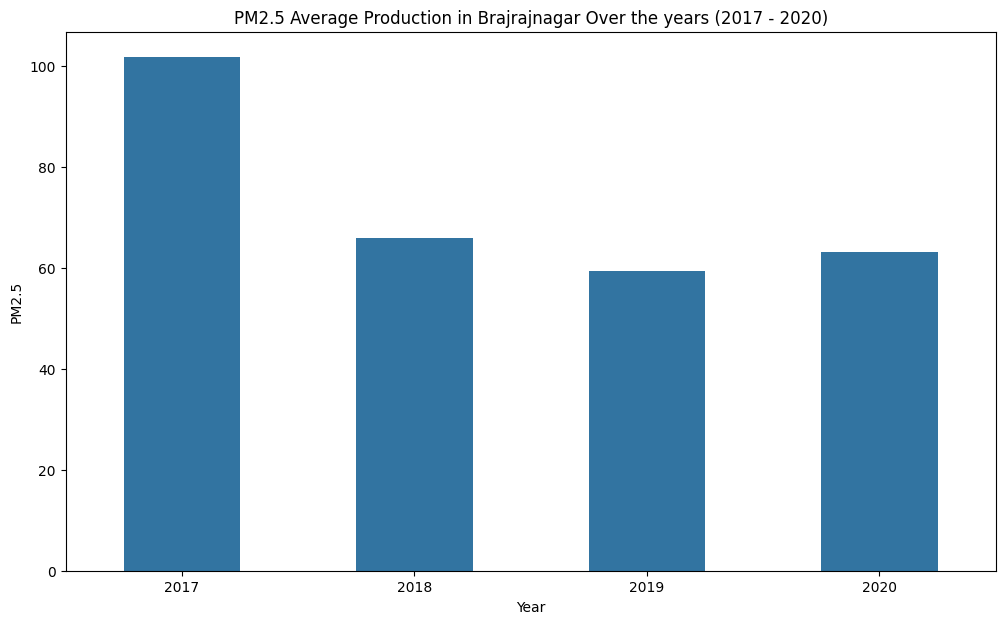

In [ ]:
group = Brajrajnagar.groupby("Year")["PM2.5_C"].mean()
plt.figure(figsize=(12, 7))
sns.barplot(data=group, width=.5)
plt.ylabel("PM2.5")
plt.title("PM2.5 Average Production in Brajrajnagar Over the years (2017 - 2020)")
plt.show()

* Chennai City

Insights:
* 2015 (Highest amount produced in Chennai city).
* 2020 (Least amount produced).
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

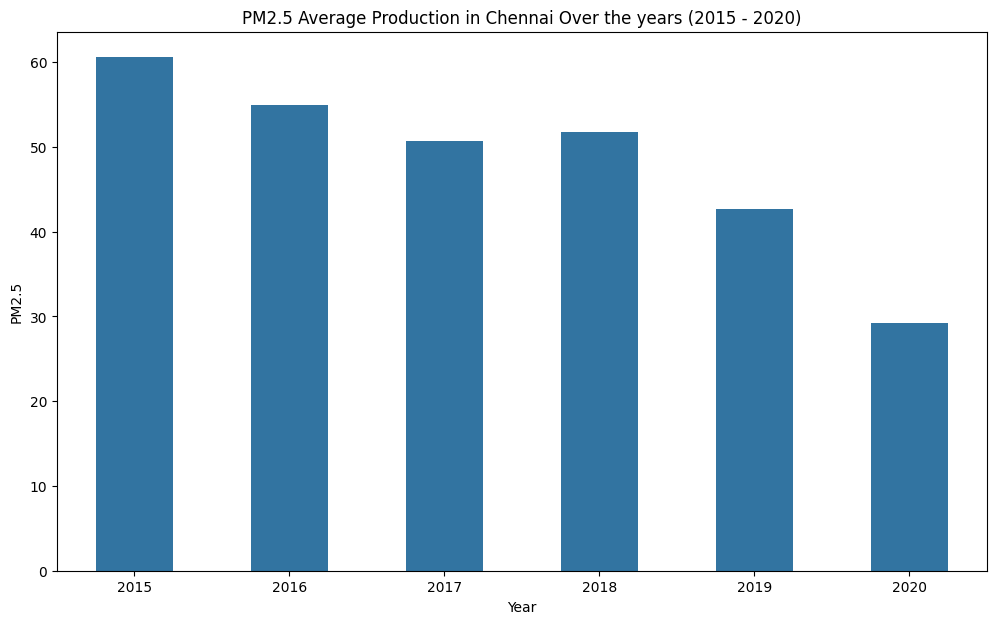

In [ ]:
group = Chennai.groupby("Year")["PM2.5_C"].mean()
plt.figure(figsize=(12, 7))
sns.barplot(data=group, width=.5)
plt.ylabel("PM2.5")
plt.title("PM2.5 Average Production in Chennai Over the years (2015 - 2020)")
plt.show()

* Delhi City

Insights: 
* 2016 (Highest amount produced in Delhi city).
* 2020 (Least amount produced).
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

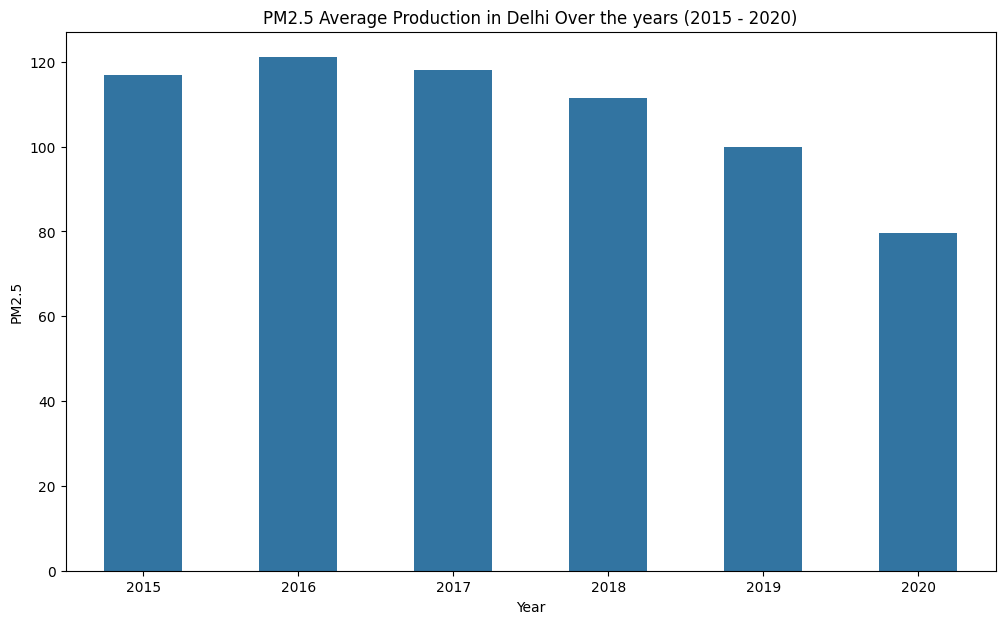

In [ ]:
group = Delhi.groupby("Year")["PM2.5_C"].mean()
plt.figure(figsize=(12, 7))
sns.barplot(data=group, width=.5)
plt.ylabel("PM2.5")
plt.title("PM2.5 Average Production in Delhi Over the years (2015 - 2020)")
plt.show()

* Gurugram City

Insights: [2016 - 2020]
* 2016 (Highest amount produced in Gurugram city).
* 2020 (Least amount produced).
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

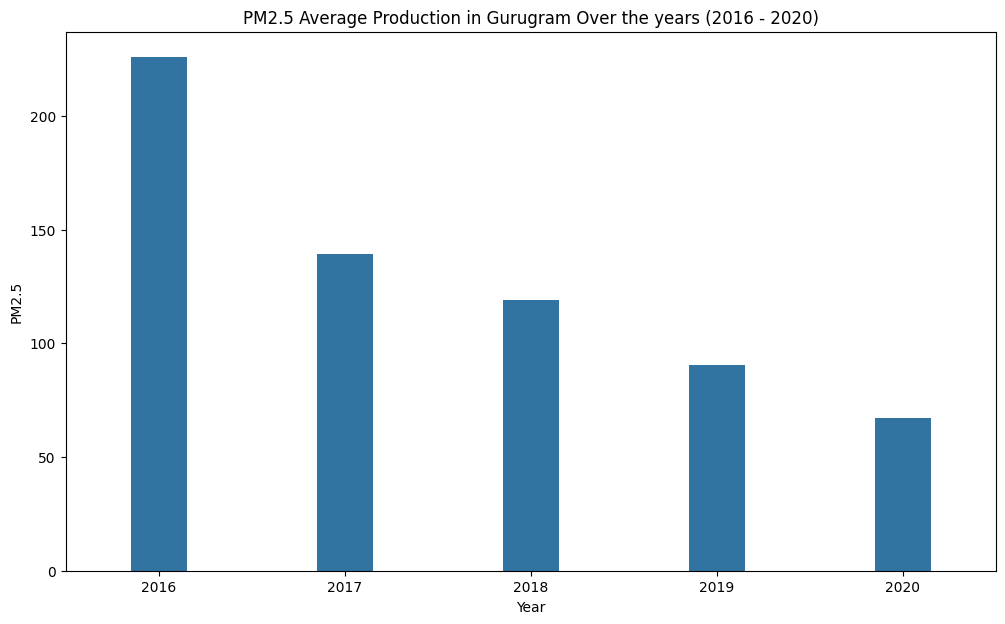

In [ ]:
group = Gurugram.groupby("Year")["PM2.5_C"].mean()
plt.figure(figsize=(12, 7))
sns.barplot(data=group, width=.3)
plt.ylabel("PM2.5")
plt.title("PM2.5 Average Production in Gurugram Over the years (2016 - 2020)")
plt.show()

* Hyderabad City

Insights: 
* 2015 (Highest amount produced in Hyderabad city).
* 2020 (Least amount produced).
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

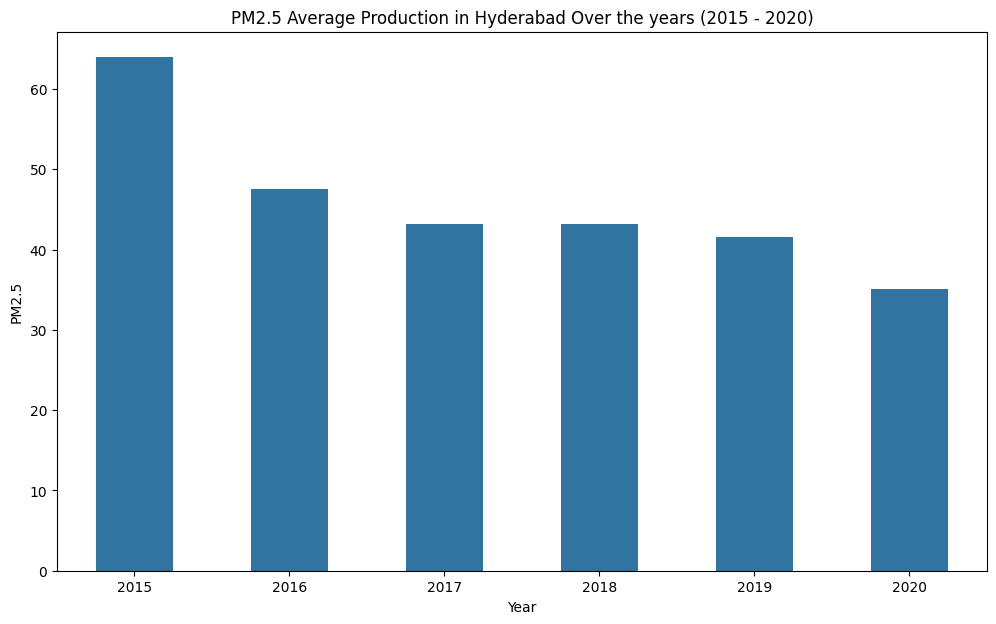

In [ ]:
group = Hyderabad.groupby("Year")["PM2.5_C"].mean()
plt.figure(figsize=(12, 7))
sns.barplot(data=group, width=.5)
plt.ylabel("PM2.5")
plt.title("PM2.5 Average Production in Hyderabad Over the years (2015 - 2020)")
plt.show()

* Jaipur City

Insights: [2017 - 2020]
* 2017 (Highest amount produced in Jaipur city).
* 2020 (Least amount produced).
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

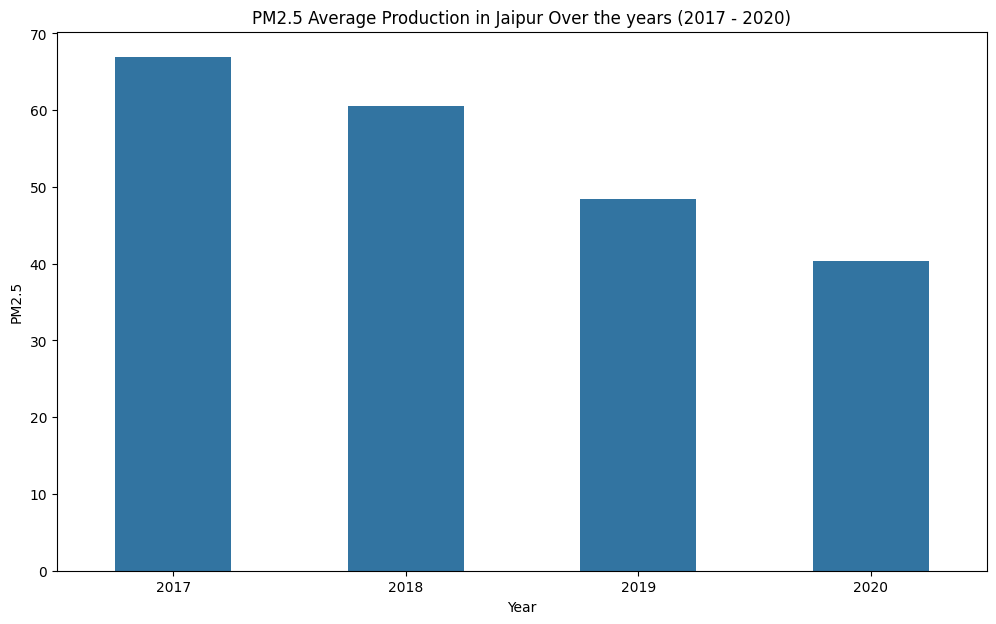

In [ ]:
group = Jaipur.groupby("Year")["PM2.5_C"].mean()
plt.figure(figsize=(12, 7))
sns.barplot(data=group, width=.5)
plt.ylabel("PM2.5")
plt.title("PM2.5 Average Production in Jaipur Over the years (2017 - 2020)")
plt.show()

* Lucknow City

Insights: 
* 2018 (Highest amount produced in Lacknow city).
* 2015 (Least amount produced).
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

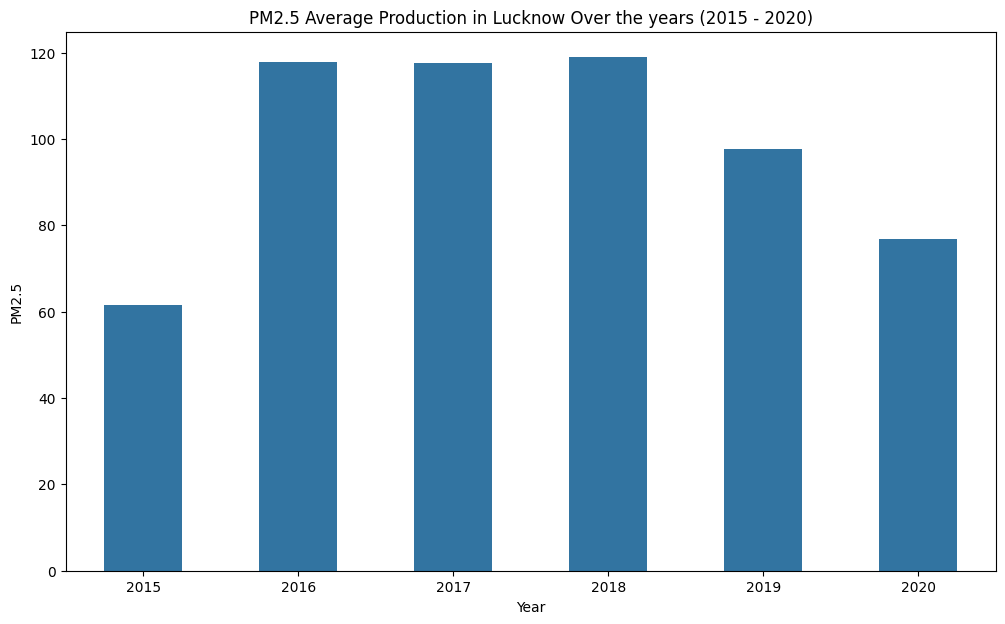

In [ ]:
group = Lucknow.groupby("Year")["PM2.5_C"].mean()
plt.figure(figsize=(12, 7))
sns.barplot(data=group, width=.5)
plt.ylabel("PM2.5")
plt.title("PM2.5 Average Production in Lucknow Over the years (2015 - 2020)")
plt.show()

* Patna City

Insights:
* 2015 (Highest amount produced in Panta city).
* 2020 (Least amount produced).
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

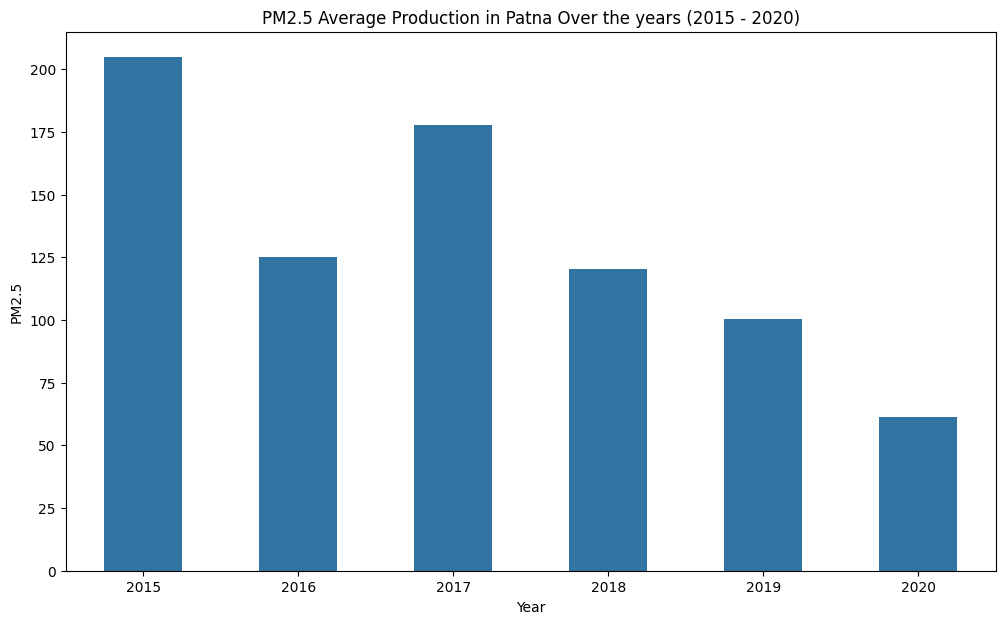

In [ ]:
group = Patna.groupby("Year")["PM2.5_C"].mean()
plt.figure(figsize=(12, 7))
sns.barplot(data=group, width=.5)
plt.ylabel("PM2.5")
plt.title("PM2.5 Average Production in Patna Over the years (2015 - 2020)")
plt.show()

* Visakhapatnam City

Insights: [2016 - 2020]
* 2017 (Highest amount produced in Visakhapatnam city).
* 2020 (Least amount produced).
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

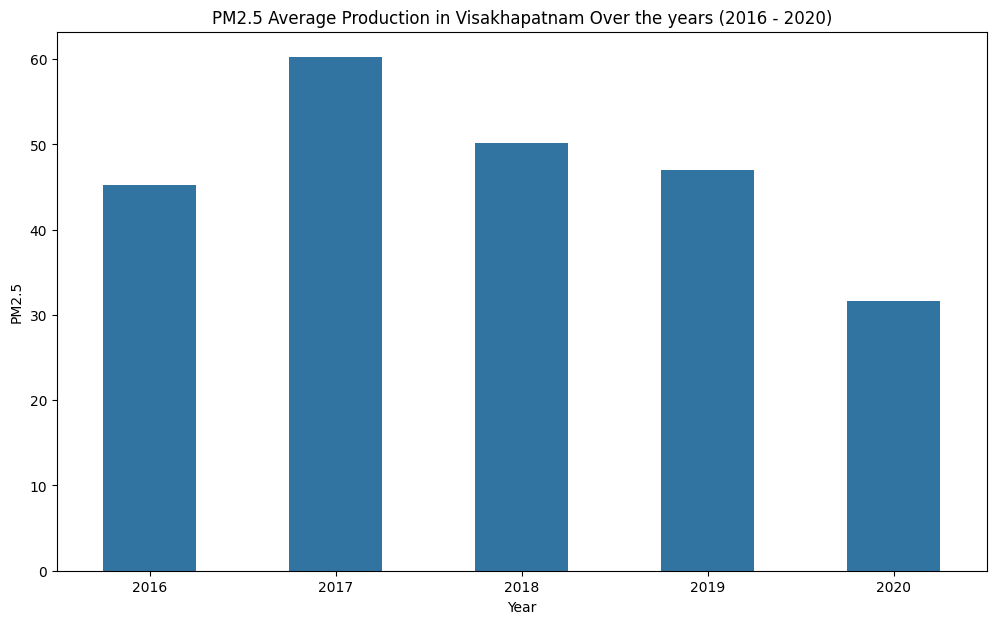

In [ ]:
group = Visakhapatnam.groupby("Year")["PM2.5_C"].mean()
plt.figure(figsize=(12, 7))
sns.barplot(data=group, width=.5)
plt.ylabel("PM2.5")
plt.title("PM2.5 Average Production in Visakhapatnam Over the years (2016 - 2020)")
plt.show()

# Air Quality Index over time
* Analyzing the AQI over time (each day recorded from 2015 to 2020).

Insights: 
* Air Quality in Indian cities had its worst days in 2015.
* The Air Quality increased each year.
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

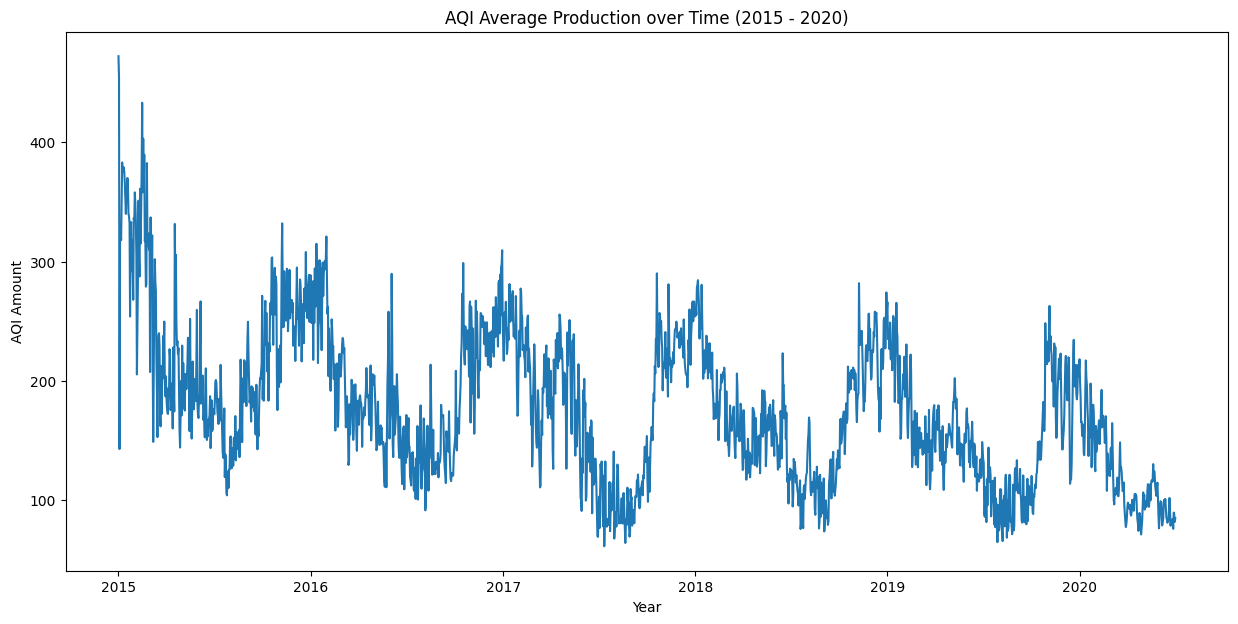

In [ ]:
group = df.groupby("Date")["AQI_C"].mean()
plt.figure(figsize=(15, 7))
plt.plot(group)
plt.title("AQI Average Production over Time (2015 - 2020)")
plt.xlabel("Year")
plt.ylabel("AQI Amount")
plt.show()

# Air Quality over the Years (2015 - 2020)
* Analyzing Average Air Quality over the years (2015 - 2020).
* Only included the records of the citites that are recorded in years (2015 - 2020).

Insights: 
* Air Quality in Indian cities had its worst days in 2015.
* The Air Quality increased each year.
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

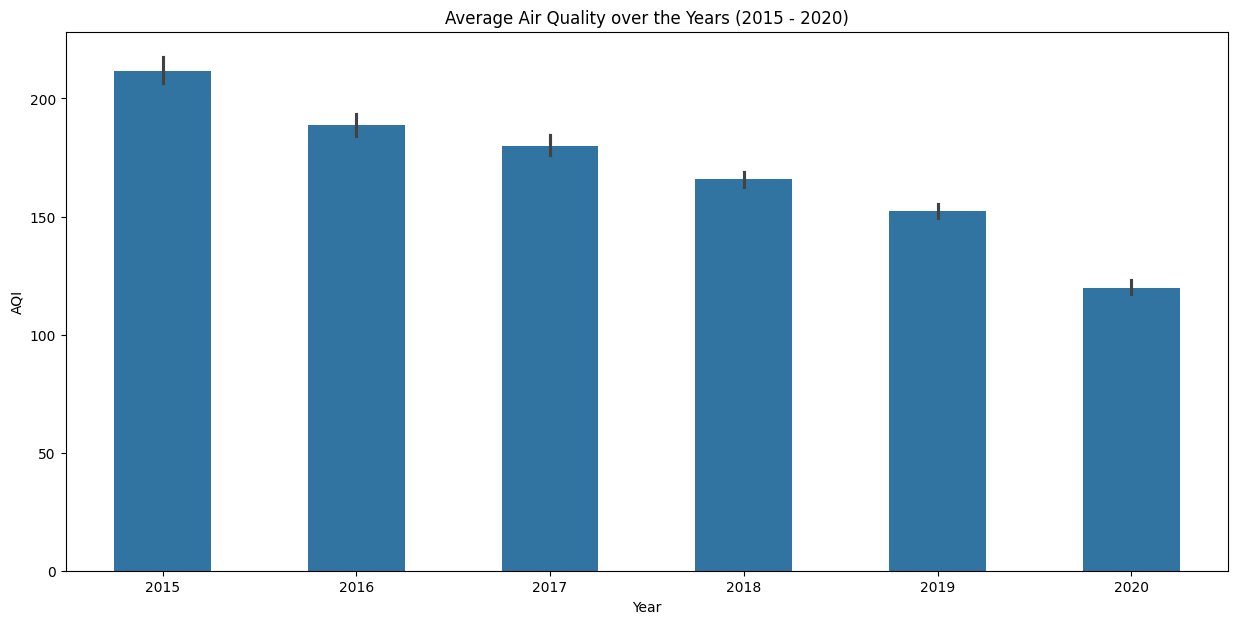

In [ ]:
cities = df.groupby("City")["Year"].nunique()[lambda x: x == 6].index.tolist()
sub_df = df[df["City"].isin(cities)]
group = sub_df.groupby("Year")["AQI_C"].mean()
plt.figure(figsize=(15, 7))
sns.barplot(data=df, width=.5, x="Year", y="AQI_C")
plt.title("Average Air Quality over the Years (2015 - 2020)")
plt.xlabel("Year")
plt.ylabel("AQI")
plt.show()

# Air Quality per Month over the Years

Insights: 
* Air Quality decreases the most in December / November.
* The Best Air Quality (as average) is in August / July.
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

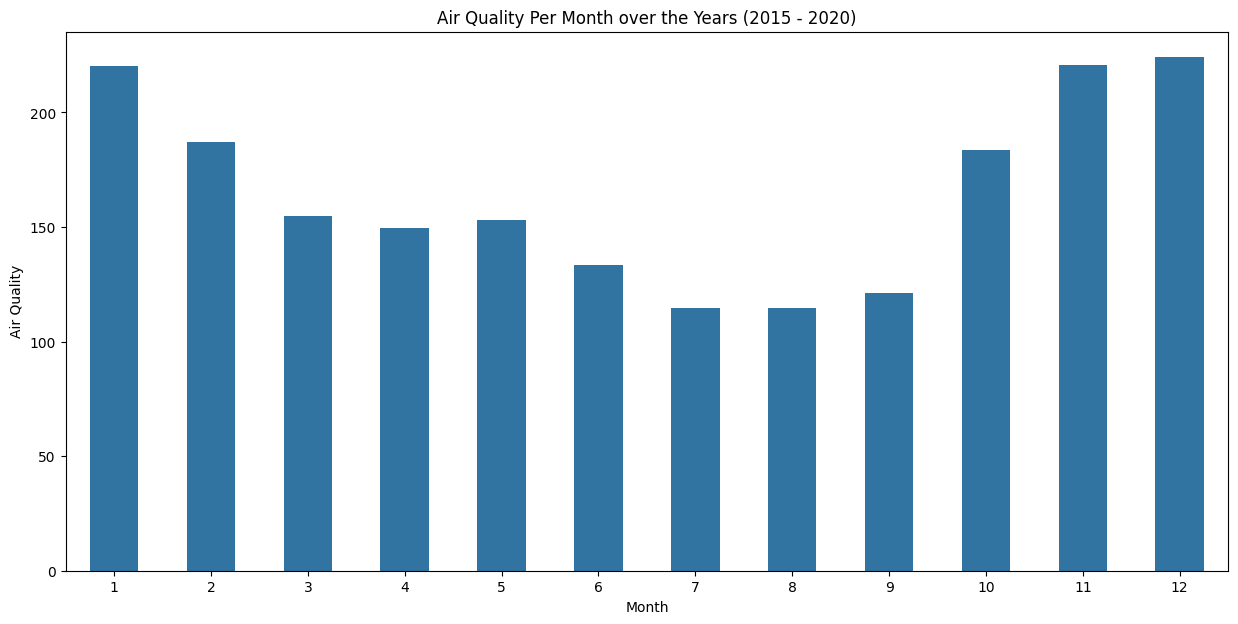

AQI_C
Month            
8      114.444749
7      114.728286
9      121.144006
6      133.402031
4      149.468956
5      153.236974
3      154.652010
10     183.793265
2      186.905210
1      220.389953
11     220.599357
12     224.003723

In [ ]:
group = pd.DataFrame(df.groupby("Month")["AQI_C"].mean().sort_values())
plt.figure(figsize=(15, 7))
sns.barplot(data=group, width=.5, x="Month", y="AQI_C")
plt.title("Air Quality Per Month over the Years (2015 - 2020)")
plt.xlabel("Month")
plt.ylabel("Air Quality")
plt.show()
group

# AQI Per City (2020)
* Exploring the cities with the most polluted air.
* The greater the AQI is the worst the air quality.

Insights: 
* Delhi & Ahmedabad are the cities that recorded the worst Air Quality in the years (2015 - 2020).
* Amaravati has the best Air Quality among all the recorded indian cities.
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

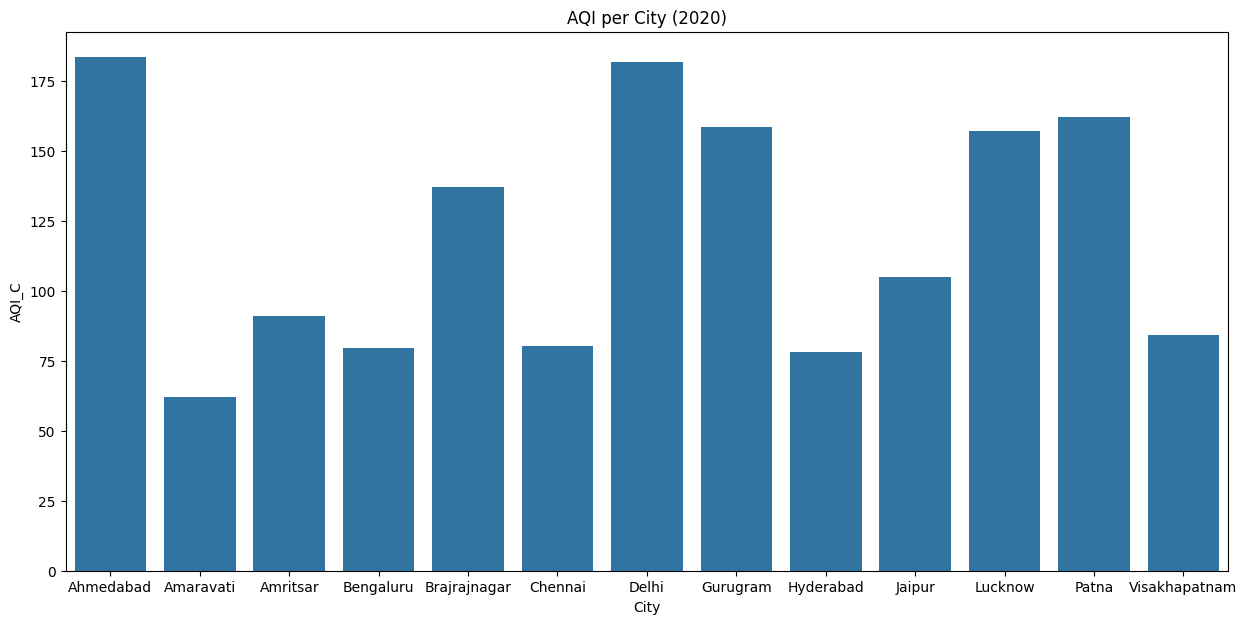

In [ ]:
sub_group = df[df["Year"] == 2020]
group = pd.DataFrame(sub_group.groupby("City")["AQI_C"].mean())
plt.figure(figsize=(15, 7))
sns.barplot(data= group, x="City", y="AQI_C")
plt.title("AQI per City (2020)")
plt.show()

# Pollutants Impact on AQI
Exploring which pollutant affects the AQI the most.
Here we used 2 methods:
1. Heatmap.
2. Create Subplots of Scatter plots that show the relationship between (AQI & pollutants)

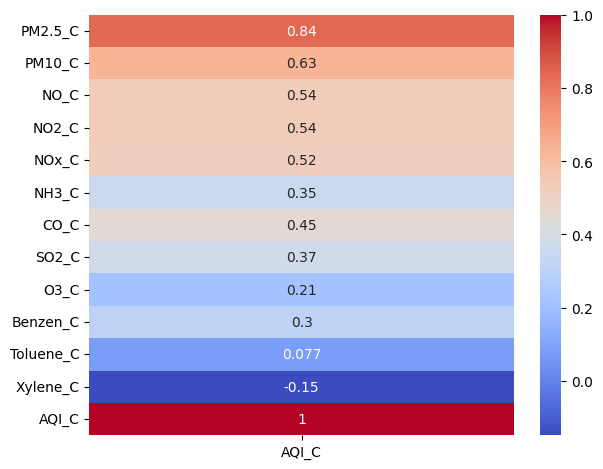

In [ ]:
pollutants = ['PM2.5_C', 'PM10_C', 'NO_C', 'NO2_C', 'NOx_C', 'NH3_C', 'CO_C', 'SO2_C', 'O3_C', 'Benzen_C', 'Toluene_C', 'Xylene_C']

sns.heatmap(df[pollutants + ['AQI_C']].corr()[['AQI_C']], annot=True, cmap='coolwarm')

plt.tight_layout()
plt.show()


Insights: [From Both Heatmap & Scatterplots]
* As we can see PM2.5 has the highest positive relationship with Air Qulity Index. (The more produced the worst the Air Quality becomes)
* Xylene has a small negative relation with Air Quality index, which states that the more Xylene produced the better for air quality.
* Toluene on the other hand has the slightest relation with Air Quality but in a positive direction.
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

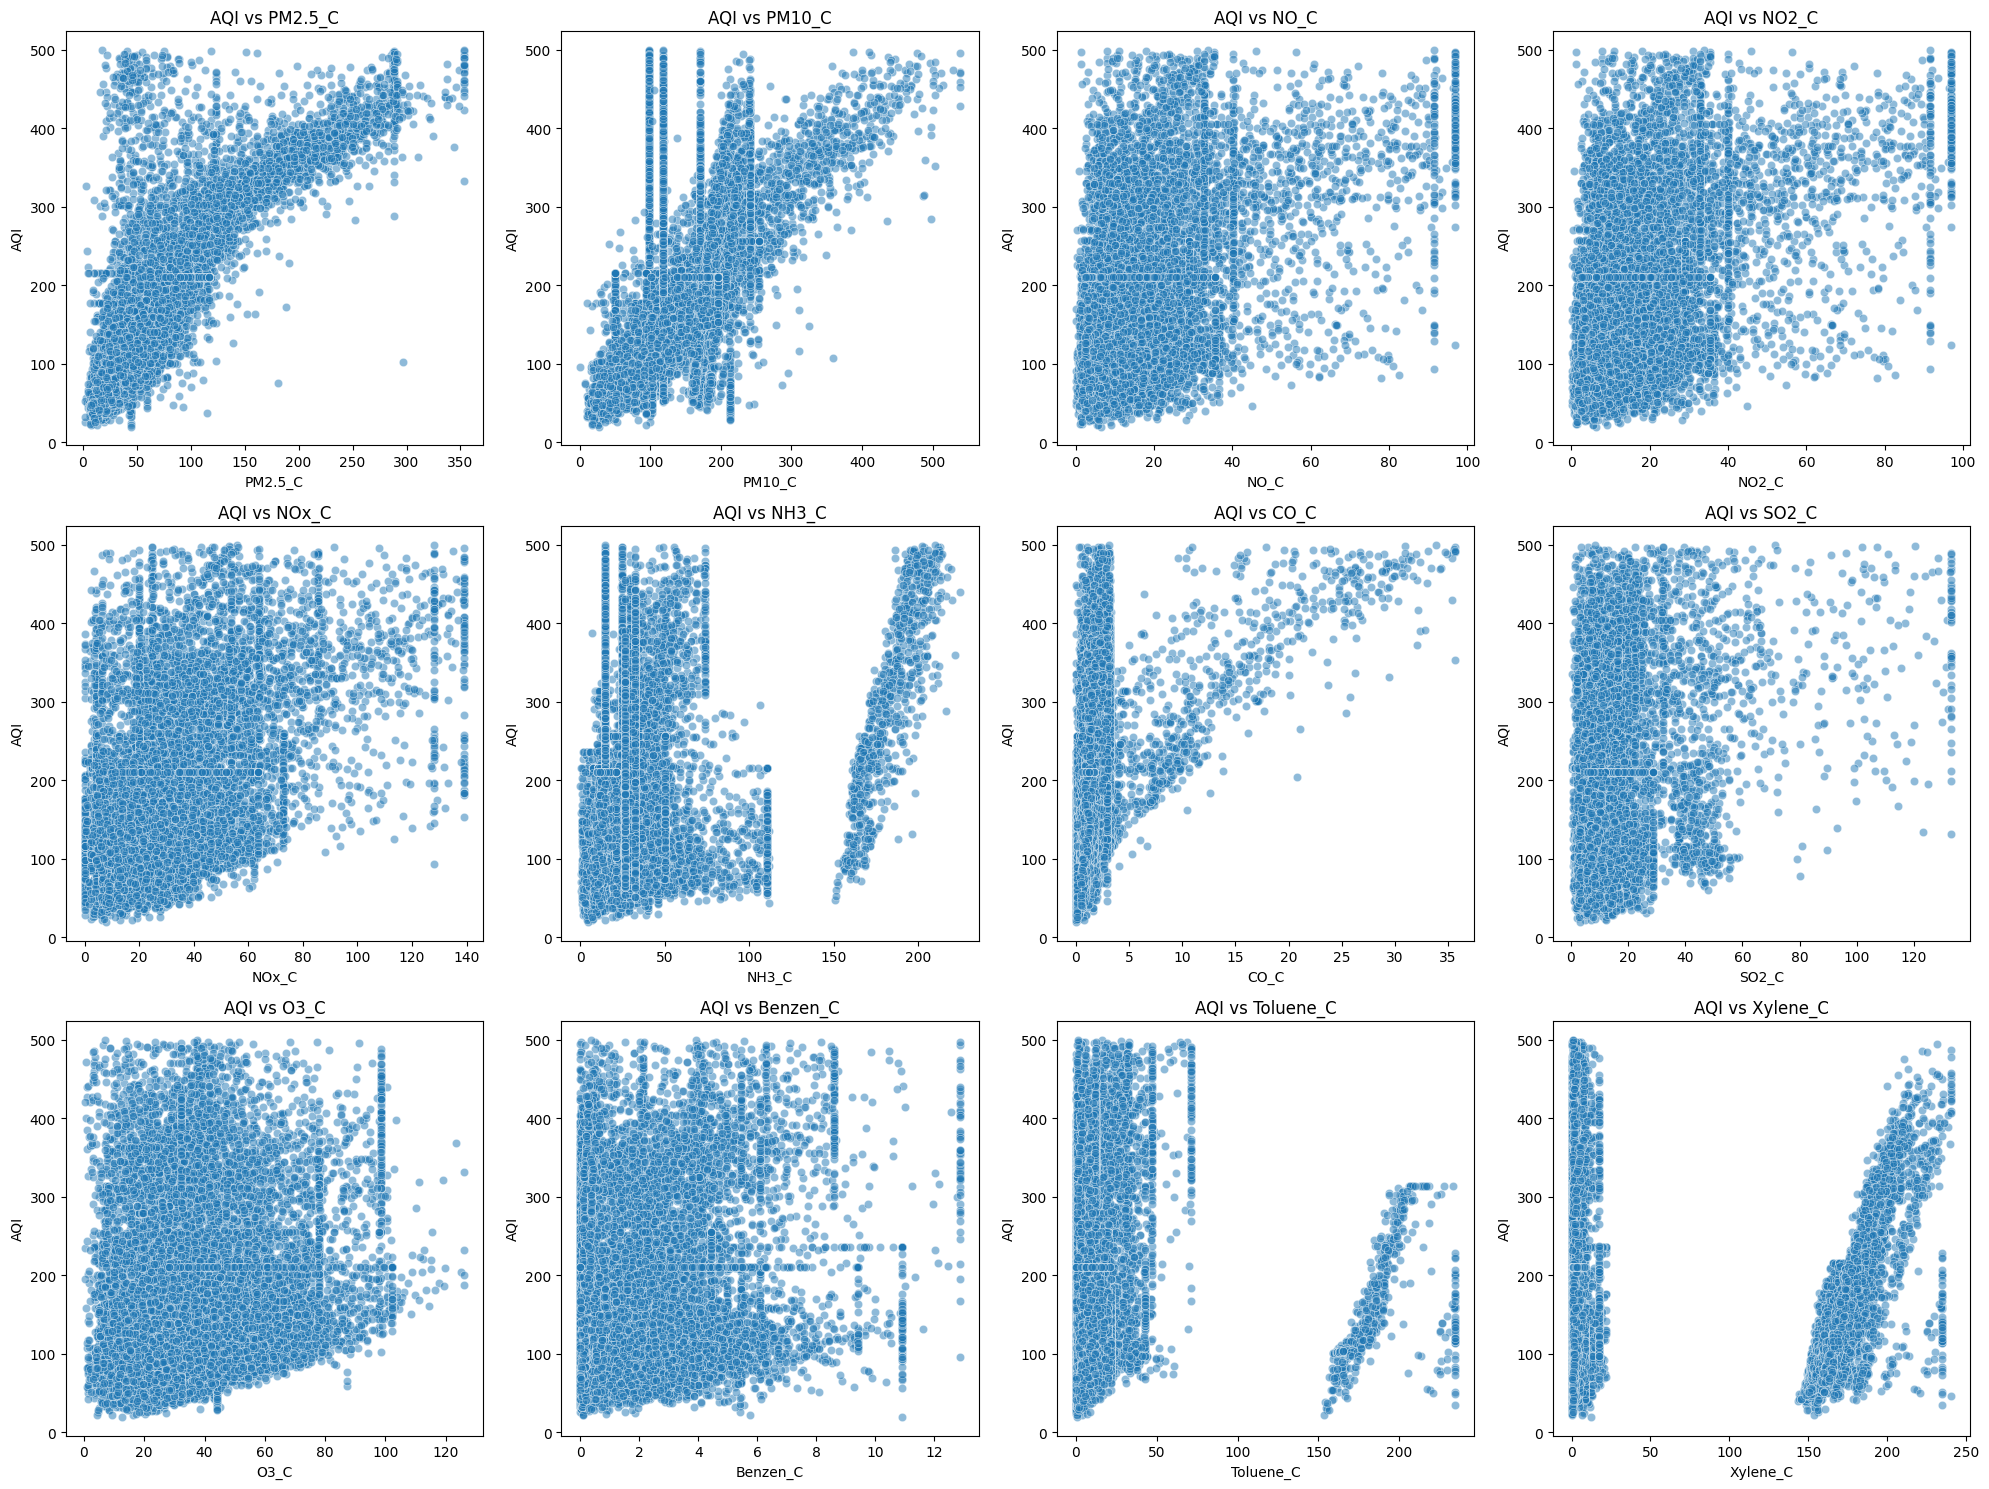

In [ ]:
fig, axes = plt.subplots(3, 4, figsize=(20, 15))  # 3 rows, 4 columns grid
axes = axes.flatten()

for i, pollutant in enumerate(pollutants):
    sns.scatterplot(x=df[pollutant], y=df['AQI_C'], ax=axes[i], alpha=0.5)
    axes[i].set_title(f'AQI vs {pollutant}')
    axes[i].set_xlabel(pollutant)
    axes[i].set_ylabel('AQI')

plt.tight_layout()
plt.show()


## Key Insights

- **PM2.5 is the dominant pollutant** contributing to poor AQI across most cities.
- **Delhi and Kanpur consistently rank highest** in average AQI from 2015–2020.
- **Seasonal variation is strong:** winter months (Nov–Jan) show the worst air quality.
- **PM10 and NO are also highly correlated with AQI,** while O3 shows weaker influence.
- Several cities have **incomplete yearly data,** requiring caution in comparisons.

## **Thank You**